<a href="https://colab.research.google.com/github/Breno-Valle/Data-Viz-with-Loft-Apartments/blob/main/Loft_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
# 0.5 doesn't support tooltip, must install dev instead
!pip install git+https://github.com/python-visualization/folium

import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.set()
import geopandas

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-vq_mkjxx
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-vq_mkjxx
  Created wheel for folium: filename=folium-0.0.0-py2.py3-none-any.whl size=94759 sha256=41381ed7c2576aa9692ddb25327f4a0ec6986e3240428dc651afbe2b74d43fd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ohm0sfjj/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [2]:
sp_data = pd.read_csv('/content/sao-paulo-properties-april-2019.csv')


In [3]:
sp_data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


1-Shape

In [4]:
print(f'Number of rows: {sp_data.shape[0]}')
print(f'NUmber of columns: {sp_data.shape[1]}')

Number of rows: 13640
NUmber of columns: 16


2_types

In [5]:
sp_data.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

3-Missing Values

In [6]:
(sp_data.isnull().sum() / sp_data.shape[0])

Price               0.0
Condo               0.0
Size                0.0
Rooms               0.0
Toilets             0.0
Suites              0.0
Parking             0.0
Elevator            0.0
Furnished           0.0
Swimming Pool       0.0
New                 0.0
District            0.0
Negotiation Type    0.0
Property Type       0.0
Latitude            0.0
Longitude           0.0
dtype: float64

4-Outliers

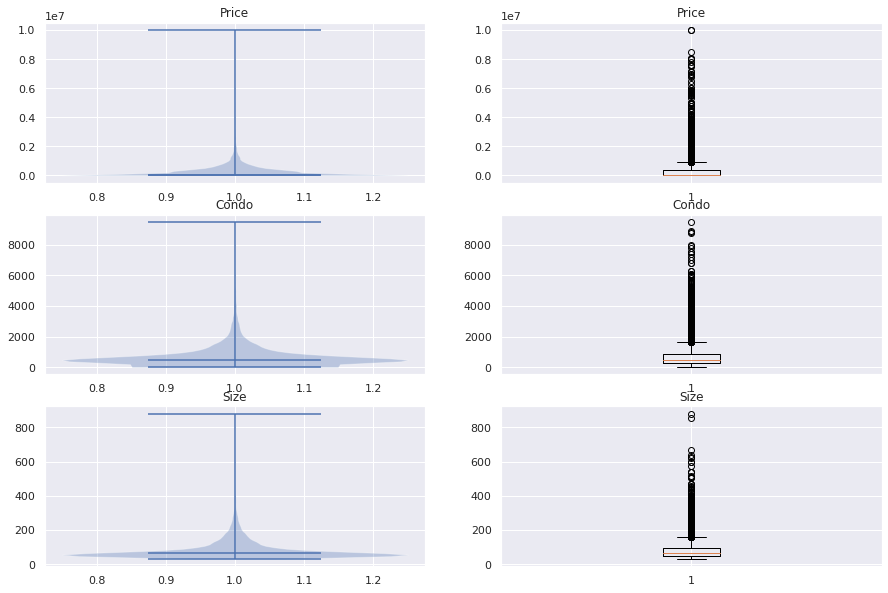

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

axes[0,0].violinplot(sp_data['Price'], showmedians=True)
axes[0,0].set_title('Price')
axes[0,0].yaxis.grid(True)
axes[0,1].boxplot(sp_data['Price'])
axes[0,1].set_title('Price')
axes[0,1].yaxis.grid(True)

axes[1,0].violinplot(sp_data['Condo'], showmedians=True)
axes[1,0].set_title('Condo')
axes[1,0].yaxis.grid(True)
axes[1,1].boxplot(sp_data['Condo'])
axes[1,1].set_title('Condo')
axes[1,1].yaxis.grid(True)

axes[2,0].violinplot(sp_data['Size'], showmedians=True)
axes[2,0].set_title('Size')
axes[2,0].yaxis.grid(True)
axes[2,1].boxplot(sp_data['Size'])
axes[2,1].set_title('Size')
axes[2,1].yaxis.grid(True)




We will really need Latitude and Longitude later, so pay attention now:


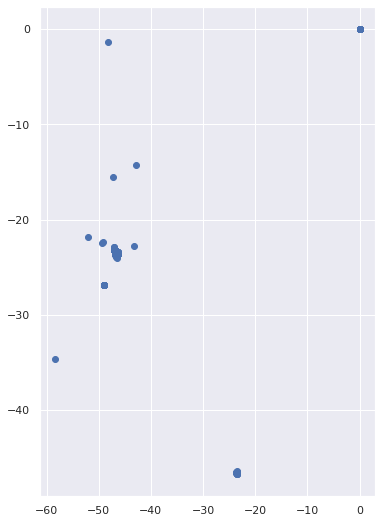

In [8]:
plt.figure(figsize=(6,9))
plt.scatter(sp_data['Longitude'], sp_data['Latitude'])


Text(0.5, 1.0, 'Longitude Violinplot')

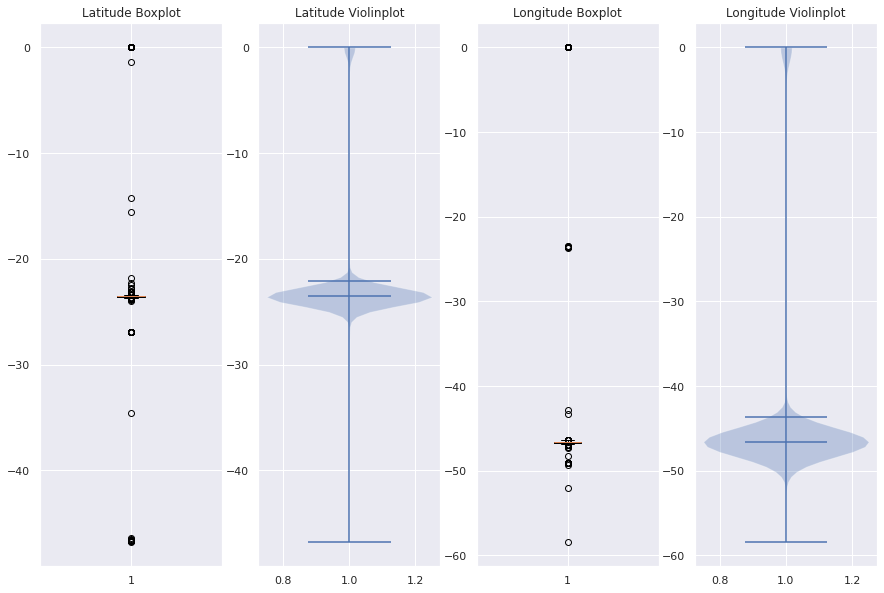

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10))

axes[0].boxplot(sp_data['Latitude'])
axes[0].set_title('Latitude Boxplot')
axes[1].violinplot(sp_data['Latitude'], showmedians=True, showmeans=True)
axes[1].set_title('Latitude Violinplot')

axes[2].boxplot(sp_data['Longitude'])
axes[2].set_title('Longitude Boxplot')
axes[3].violinplot(sp_data['Longitude'], showmedians=True, showmeans=True)
axes[3].set_title('Longitude Violinplot')


In [10]:
sp_data['Latitude'] = np.where(sp_data['Latitude']< -23.7, 100, sp_data['Latitude'])
sp_data['Latitude'] = np.where(sp_data['Latitude']> -23.4, 0, sp_data['Latitude'])

sp_data['Longitude'] = np.where(sp_data['Longitude']> -46.3, 100, sp_data['Longitude'])
sp_data['Longitude'] = np.where(sp_data['Longitude']< -46.8, 0, sp_data['Longitude'])


In [11]:

geo_sp_data = sp_data[sp_data['Latitude'] != 0]
geo_sp_data= geo_sp_data[geo_sp_data['Longitude'] != 0]


Text(0.5, 1.0, 'Longitude')

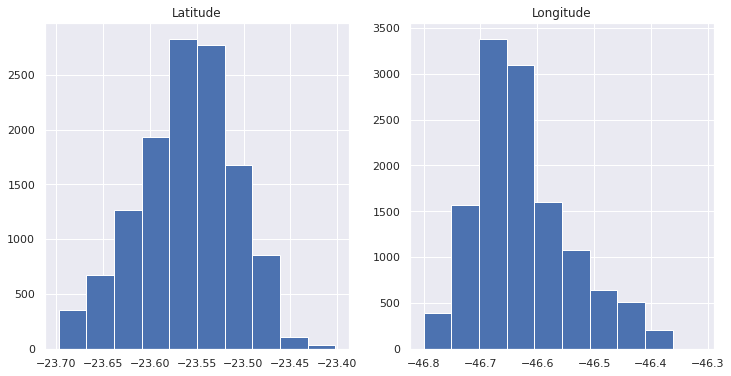

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].hist(geo_sp_data['Latitude'])
axs[0].set_title('Latitude')
axs[1].hist(geo_sp_data['Longitude'])
axs[1].set_title('Longitude')


Text(0.5, 1.0, 'Longitude Boxplot')

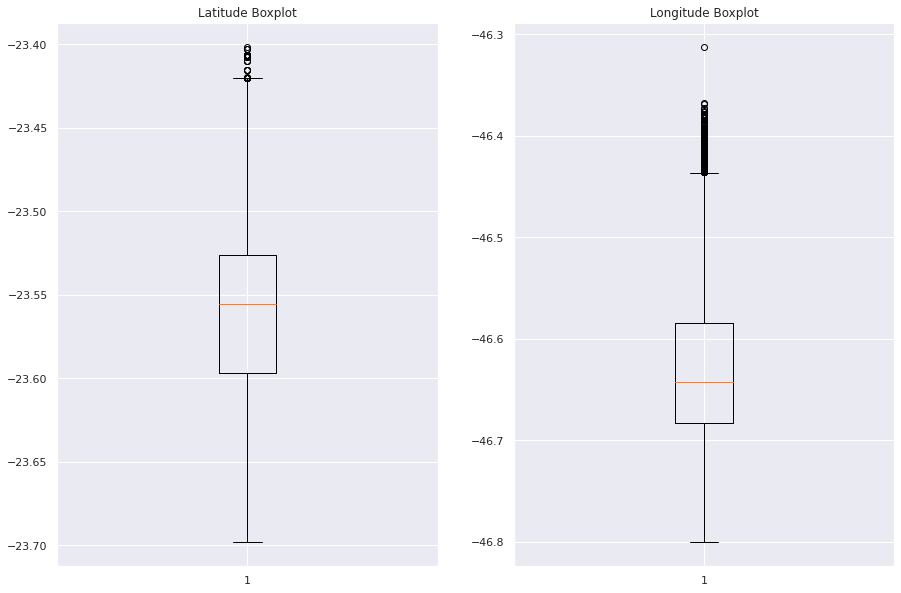

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

axes[0].boxplot(geo_sp_data['Latitude'])
axes[0].set_title('Latitude Boxplot')

axes[1].boxplot(geo_sp_data['Longitude'])
axes[1].set_title('Longitude Boxplot')


In [14]:
geo_sp_data['Reais/square_meter'] = round(geo_sp_data['Price']/ geo_sp_data['Size'], 2)

5-Simple Exploratory Data Analysis

#Overview by all the Loft properties 

##Distribution 
Here we'll se the distribution of three relevant features for our analysis.
That's good to have an idea of how our values will vary and how we are going to deal with them.

Text(0.5, 1.0, 'Size')

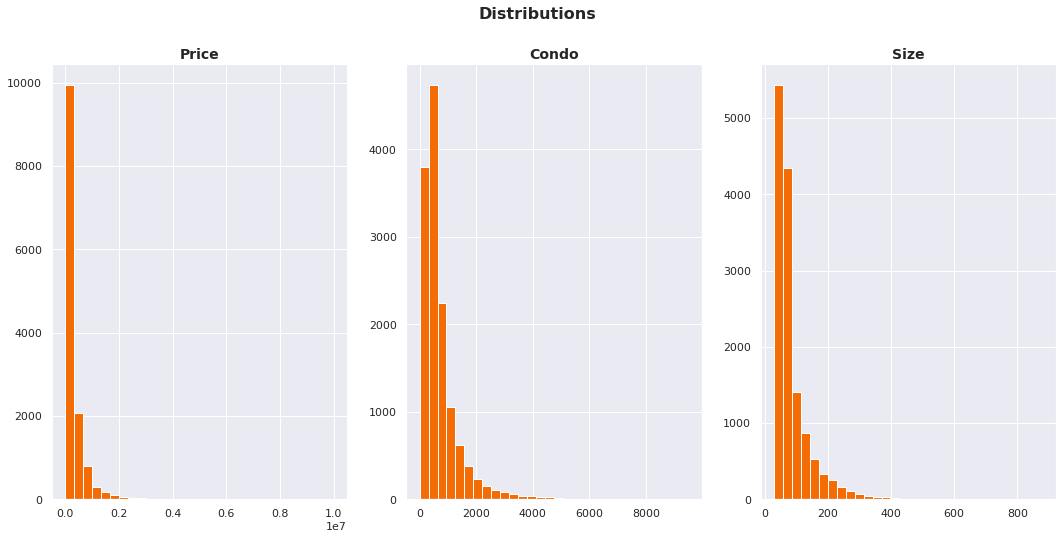

In [15]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
fig.suptitle('Distributions', fontsize=16, fontweight='bold')

axes[0].hist(sp_data['Price'], bins=30, color='#F46C06')
axes[0].set_title('Price', fontsize=14, fontweight='bold')

axes[1].hist(sp_data['Condo'], bins=30, color='#F46C06')
axes[1].set_title('Condo', fontsize=14, fontweight='bold')

axes[2].hist(sp_data['Size'],bins=30, color='#F46C06')
axes[2].set_title('Size', fontsize=14, fontweight='bold')
 

In [16]:
#all properties in that dataset are apartments
sp_data['Property Type'].value_counts()

apartment    13640
Name: Property Type, dtype: int64

In [17]:
#the most part of the apartments are not new
sp_data['New'].value_counts()

0    13427
1      213
Name: New, dtype: int64

##Main Characteristics of the propertys

- How many rooms there are on those apartments? 

- How many suites there are on those apartments? 

- How many parking space there are on those apartments? (they are really relevant when you live far from work and in an apartment)

- Does Loft's propertys have Elevators? (remember they all are apartments)

- Are Loft's propertys already Furnished?

- There is a swimming pool on them ? 

Those kind of undertanding  can help us to make a better picture of Loft's apartments main characteristics? And that can help marketing teams to know what kind of person could by our apartments. 

In [18]:
rooms= sp_data['Rooms'].value_counts()      #saving the total number of properties by number of rooms 
rooms

2     6766
3     4307
1     1740
4      802
5       20
6        3
7        1
10       1
Name: Rooms, dtype: int64

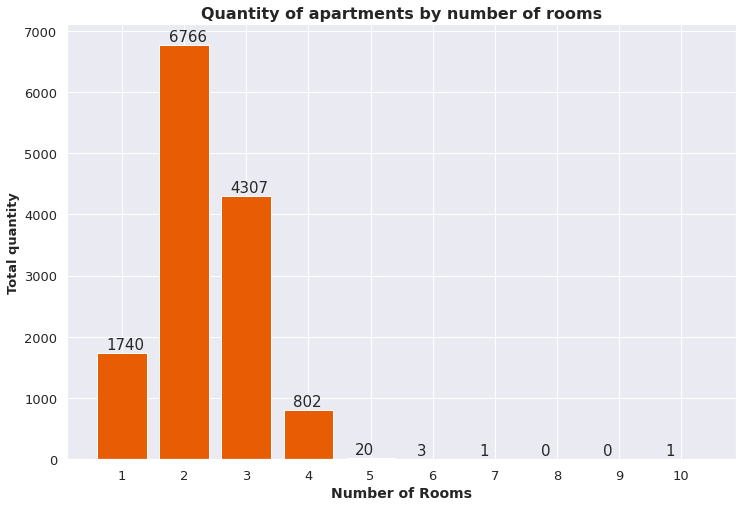

In [19]:
#real quantity of apartments for each number of rooms. As there is no number for 8 and 9 rooms i choosed to set it manually
number_rooms = [rooms[1], rooms[2], rooms[3], rooms[4], rooms[5], rooms[6], rooms[7], 0, 0, rooms[10]]   
numbers= [1,2,3,4,5,6,7,8, 9, 10]  #possible number of rooms that could exist in a property

#creating a bar chart
plt.figure(figsize=(12,8))

plt.title("Quantity of apartments by number of rooms", fontsize=16, fontweight='bold')
plt.xlabel('Number of Rooms', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity', fontsize=13, fontweight='bold')
plt.xticks(ticks=numbers, fontsize=13)
plt.yticks(fontsize='13')

plt.bar(numbers, number_rooms, color = '#E85D04')

#setting quantity of properties above each bar
for index,data in enumerate(number_rooms):
    plt.text(x=index+0.75 , y =data+60 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

In [20]:
suites = sp_data['Suites'].value_counts()      #saving the total number of properties by number of suites
suites

1    8669
0    3285
3     827
2     607
4     247
5       4
6       1
Name: Suites, dtype: int64

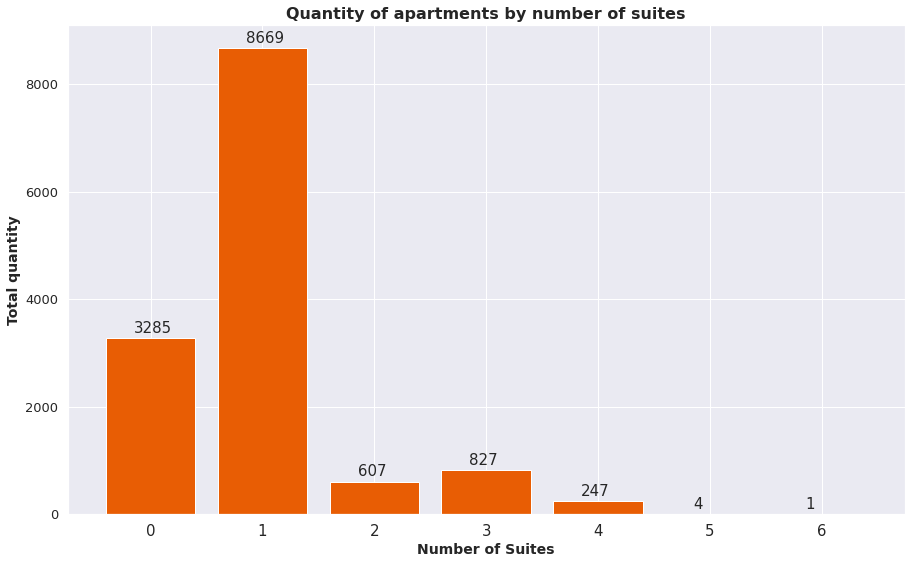

In [21]:
number_suites = [suites[c] for c in range (0,7)]    #as there is no Zero in number of properties we can use list comprehension 
num = [0,1,2,3,4,5,6]    #possible number of suites that could exist in a property

#creating a bar chart 
plt.figure(figsize=(15,9))

plt.title("Quantity of apartments by number of suites", fontsize=16, fontweight='bold')
plt.xlabel('Number of Suites', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')

plt.bar(num, number_suites, color = '#E85D04')

#setting quantity of properties above each bar
for index,data in enumerate(number_suites):
    plt.text(x=index-0.15 , y =data+100 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [22]:
parking = sp_data['Parking'].value_counts()
parking

1    8899
2    2974
3     757
0     570
4     347
5      72
6      14
7       4
8       2
9       1
Name: Parking, dtype: int64

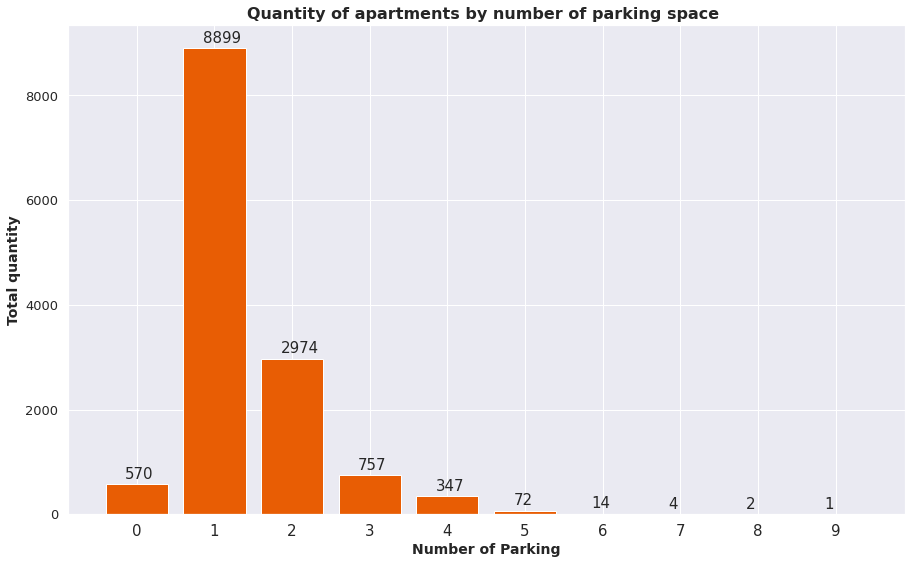

In [23]:
number_parking = [parking[c] for c in range(0,10)]
num = [0,1,2,3,4,5,6,7,8,9]

#creating a bar chart
plt.figure(figsize=(15,9))

plt.title("Quantity of apartments by number of parking space ", fontsize=16, fontweight='bold')
plt.xlabel('Number of Parking', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')

plt.bar(num, number_parking, color = '#E85D04')


#setting quantity of properties above each bar
for index,data in enumerate(number_parking):
    plt.text(x=index-0.15 , y =data+100 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [24]:
elevator = sp_data['Elevator'].value_counts()
elevator

0    8809
1    4831
Name: Elevator, dtype: int64

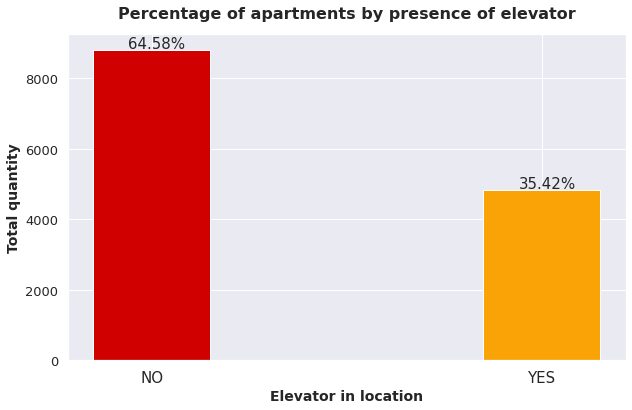

In [25]:
number_elevator = [elevator[0], elevator[1]] #simple input of binary value. Actually i did it to follow the pattern of these project
elevator_type = ['NO', 'YES']

#ploting a bar chart
plt.figure(figsize=(10,6))

plt.title("Percentage of apartments by presence of elevator", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Elevator in location', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(elevator_type, number_elevator, color = ['#D00000','#FAA307'], width=0.3)

#setting percentage of each category above each bar
#to set it above each bar i used: {data/sum(number_elevator)*100:.2f}
for index,data in enumerate(number_elevator):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(number_elevator)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [26]:
furnished = sp_data['Furnished'].value_counts()
furnished

0    11638
1     2002
Name: Furnished, dtype: int64

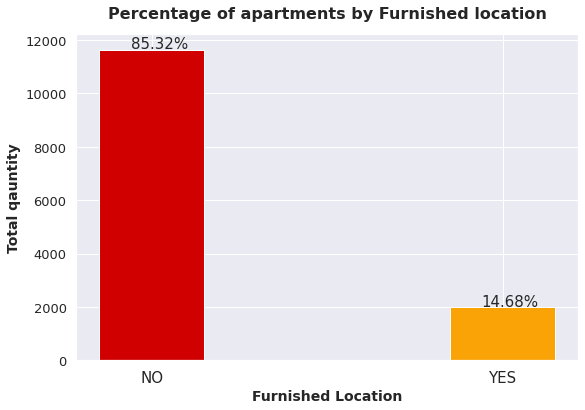

In [27]:
number_furnished= [furnished[0],furnished[1]]  #again, just like the above code, used list to assign binary category
is_furnished = ['NO', 'YES']

#ploting a bar chart
plt.figure(figsize=(9,6))

plt.title("Percentage of apartments by Furnished location", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Furnished Location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(is_furnished, number_furnished, color = ['#D00000','#FAA307'], width=0.3)

#setting percentage of each category above each bar
#to set it above each bar i used: {data/sum(number_furnished)*100:.2f}
for index,data in enumerate(number_furnished):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(number_furnished)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [28]:
pool = sp_data['Swimming Pool'].value_counts()
pool

1    6986
0    6654
Name: Swimming Pool, dtype: int64

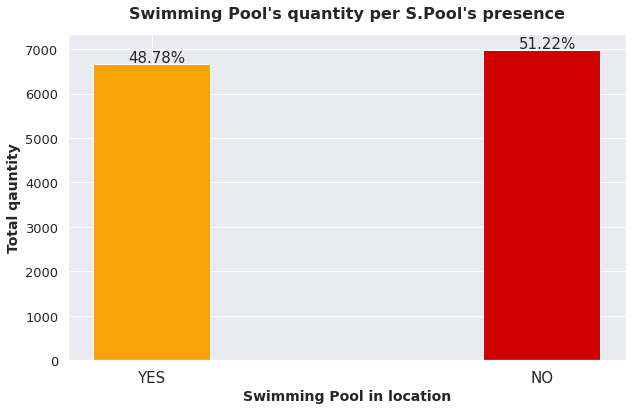

In [29]:
number_pool = [pool[0], pool[1]]
is_pool = ['YES', 'NO']

#plotting bar chart
plt.figure(figsize=(10,6))

plt.title("Swimming Pool's quantity per S.Pool's presence", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Swimming Pool in location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(is_pool, number_pool, color = ['#FAA307', '#D00000'], width=0.3)

#setting percentage of each category above each bar
#to set it above each bar i used: {data/sum(number_pool)*100:.2f}
for index,data in enumerate(number_pool):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(number_pool)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()


In [30]:
property = sp_data['Property Type'].value_counts()
property

apartment    13640
Name: Property Type, dtype: int64

In [31]:
negotiation = sp_data['Negotiation Type'].value_counts()
negotiation

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

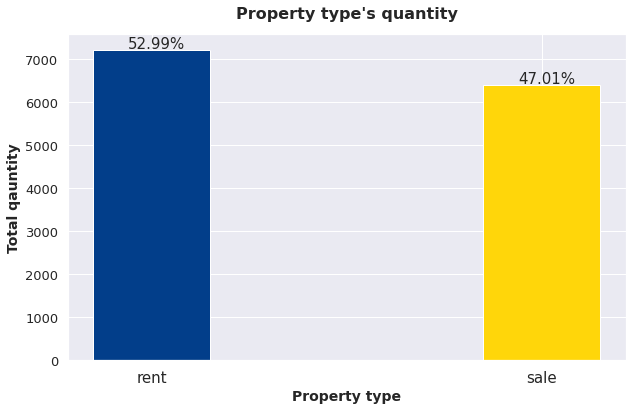

In [32]:
negotiation_number = [negotiation[0], negotiation[1]]
negotiation_type = ['rent', 'sale']

#plotting bar chart
plt.figure(figsize=(10,6))

plt.title("Property type's quantity", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Property type', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(negotiation_type, negotiation_number, color = ['#023E8A', '#FFD60A'], width=0.3)

#setting percentage of each category above each bar
#to set it above each bar i used: {data/sum(negotiation_number)*100:.2f}
for index,data in enumerate(negotiation_number):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(negotiation_number)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()


##Where are Loft's apartments located? 

- First take a look on the total distribution of those properties inbSão Paulo and surroundings. 
  
   - Red regions are those with a  lot of apartaments concentrated, followed by orange and yellow areas. Green and blue areas are those with few apartments located.
   - You can interact with these map. Will free to zoom it and see wich are the Districts with amounts of properties and all other locations that you want to see. 

In [33]:
#these next line of code use data from the geo_sp_data, created before. It doesn't contain outliers 
latitude = geo_sp_data['Latitude'].values.tolist()        #assign the Latitude of each apartment to a list
longitude = geo_sp_data['Longitude'].values.tolist()      #assign the Longitude of each apartment to list

In [34]:
locations = geo_sp_data[['Latitude', 'Longitude']]        #selecting columns from geo_sp_data 
location_list = locations.values.tolist()                 # saving those geodatas into pairs inside of a list, that compose another list
location_list[7]


[-23.53974, -46.492670000000004]

In [35]:
#creating a folium object and providing São Paulo city location
sp = folium.Map(
    location=[-23.5489, -46.6388]
)

In [36]:
#using Folium HeatMap pluggin we are able to create a heatmap of the apartments location
heat = HeatMap(( location_list), min_opacity=0.2, radius=17, blur=15,max_zoom=1)

In [37]:
#add heatmap to folium object and plot it 
sp.add_child(heat)
sp

Diving in TOP 6 most populated districts

In [38]:
district = sp_data['District'].value_counts()[:10]     #selecting the first 10 rows 
district

Moema/São Paulo                293
Mooca/São Paulo                288
Brás/São Paulo                 255
Bela Vista/São Paulo           250
Brooklin/São Paulo             250
Pinheiros/São Paulo            249
Casa Verde/São Paulo           248
Cambuci/São Paulo              241
Perdizes/São Paulo             236
Alto de Pinheiros/São Paulo    230
Name: District, dtype: int64

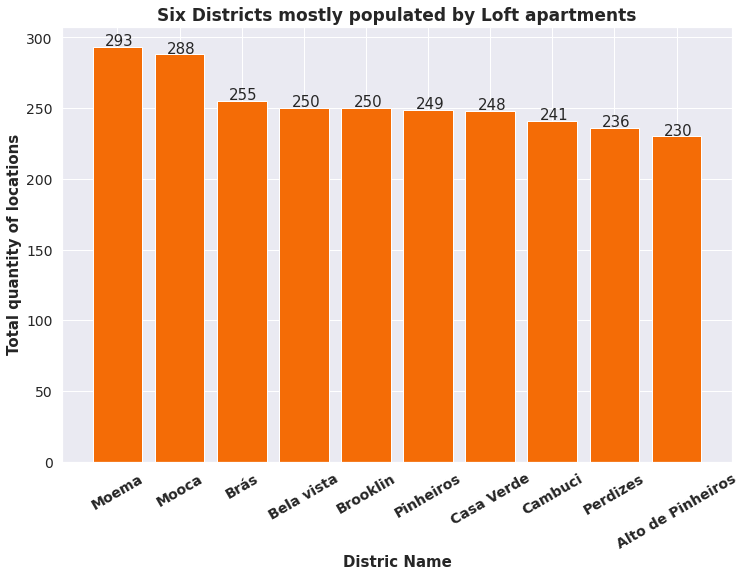

In [39]:
#using list comprehension to extract values
popular_districts =[c for c in district]
#setting manually the values, how there are just a few items thats easy to do than use district.keys() and clclena it to use in the plot
districs_labels = ['Moema','Mooca','Brás','Bela vista', 'Brooklin', 'Pinheiros','Casa Verde','Cambuci','Perdizes','Alto de Pinheiros']

#plotting bar chart
plt.figure(figsize=(12,8))

plt.title("Six Districts mostly populated by Loft apartments", fontsize=17, fontweight='bold')
plt.xlabel('Distric Name', fontsize=15, fontweight='bold')
plt.ylabel('Total quantity of locations', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=30, fontweight='bold')
plt.yticks(fontsize='14')

plt.bar(districs_labels, popular_districts, color = '#F46C06')

#setting quantity of properties above each bar
for index,data in enumerate(popular_districts):
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

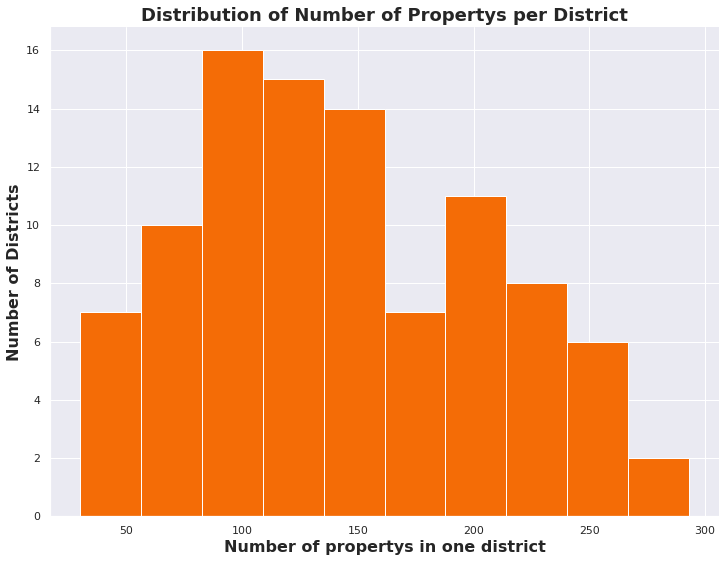

In [40]:
#plotting a histogram
plt.figure(figsize=(12,9))

plt.title('Distribution of Number of Propertys per District', fontsize=18, fontweight='bold')
plt.ylabel('Number of Districts', fontsize=16, fontweight='bold')
plt.xlabel('Number of propertys in one district', fontsize=16, fontweight='bold')

plt.hist(sp_data['District'].value_counts(),color='#F46C06')
sns.despine()
plt.show()

Sometimes its just hard to understand if the distribution is normal or not, so lets plot a density function to better visualization of these distribution and figure it out.

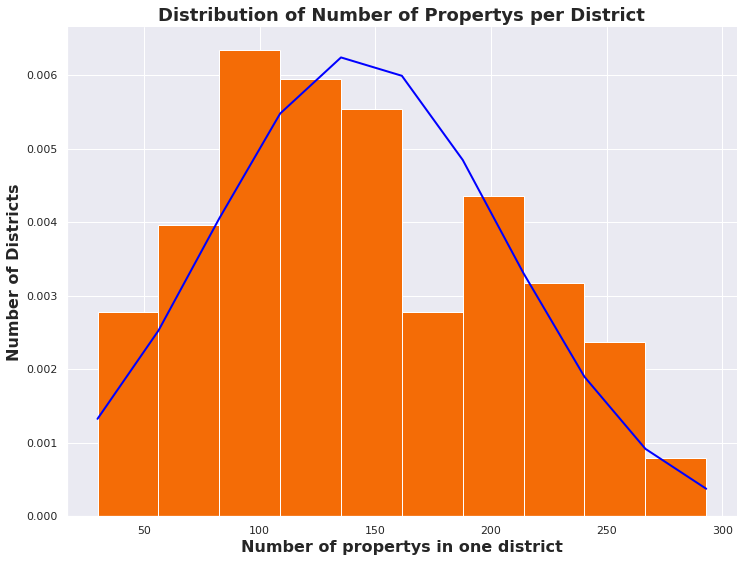

In [41]:
#setting labels and sizes to histogram
plt.figure(figsize=(12,9))
plt.title('Distribution of Number of Propertys per District', fontsize=18, fontweight='bold')
plt.ylabel('Number of Districts', fontsize=16, fontweight='bold')
plt.xlabel('Number of propertys in one district', fontsize=16, fontweight='bold')
sns.despine()

#fiting our data into an histogram with density = 1.
_, bins, _ = plt.hist(sp_data['District'].value_counts(), density=1, color='#F46C06')

# mu = mean and sigma = standard deviation. Everythong that we need to create a density function of the data
mu, sigma = scipy.stats.norm.fit(sp_data['District'].value_counts())

#creating that function with the parameters founded above
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

#plot the histogram and the density function
plt.plot(bins, best_fit_line, color='blue',linewidth=2)

# as you can see that is a really normal distribution

Bonus:creating a new metric (price/square meter)

-  This new feature its a simple but helpful metrict that measure how valuable is an apartment or region

In [42]:
#creating a new column in the dataset based in other two columns. Round the value to two numbers after the "."
sp_data['Reais/square_meter'] = round(sp_data['Price']/ sp_data['Size'], 2)
sp_data.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Reais/square_meter
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,19.79
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,22.22
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,20.83


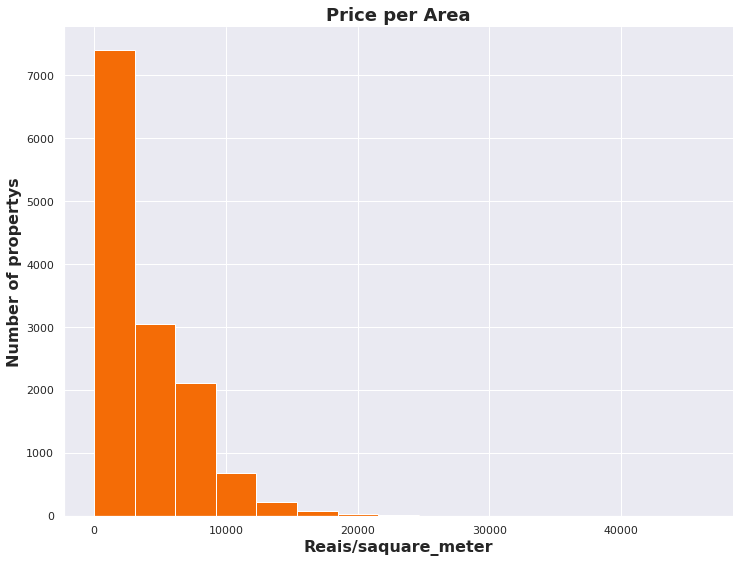

In [43]:
#plotting the histogram
plt.figure(figsize=(12,9))

plt.title('Price per Area', fontsize=18, fontweight='bold')
plt.ylabel('Number of propertys', fontsize=16, fontweight='bold')
plt.xlabel('Reais/saquare_meter', fontsize=16, fontweight='bold')

plt.hist(sp_data['Reais/square_meter'],color='#F46C06',bins=15)
sns.despine()
plt.show()

#there is a lot of low cost square meter on this dataset
#tend to have outliers

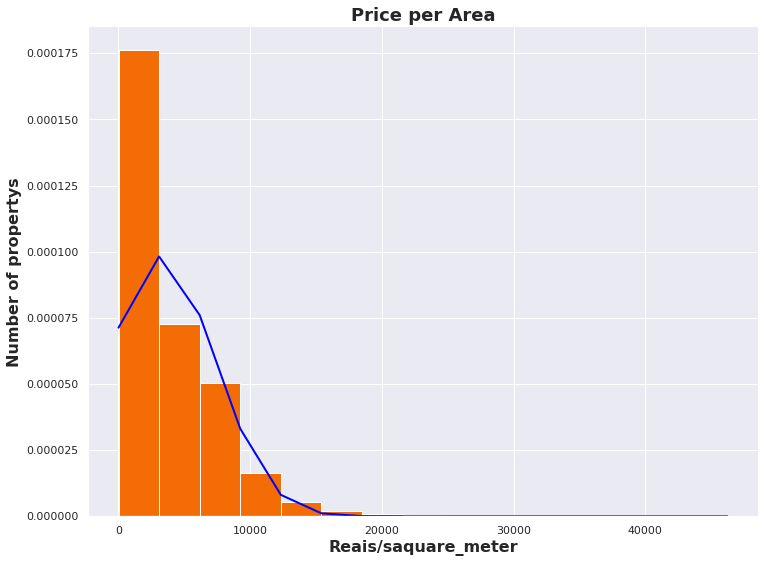

In [44]:
#same code as above to visualize the distribution of the data
#using density function

plt.figure(figsize=(12,9))

plt.title('Price per Area', fontsize=18, fontweight='bold')
plt.ylabel('Number of propertys', fontsize=16, fontweight='bold')
plt.xlabel('Reais/saquare_meter', fontsize=16, fontweight='bold')
sns.despine()

_, bins, _ = plt.hist(sp_data['Reais/square_meter'],15, density=1, color='#F46C06')

mu, sigma = scipy.stats.norm.fit(sp_data['Reais/square_meter'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line, color='blue',linewidth=2)


#Rentable Loft's Locations

- There are two populations inside this dataset: Rentable and seable apartments. And they have different features that characterize them, such as price for example. Thats why we are going to analyze they separately.

- Let's start with Rent

##Selecting only apartments available for rent

In [45]:
rent_sp_data = sp_data.loc[sp_data['Negotiation Type']=='rent']

In [46]:
rent_sp_data.head(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Reais/square_meter
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,19.79
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,22.22


In [47]:
# let's confirm if there is only apartments for rent now
rent_sp_data['Negotiation Type'].value_counts()

rent    7228
Name: Negotiation Type, dtype: int64

##Distribution

Text(0.5, 1.0, 'Rent-Size')

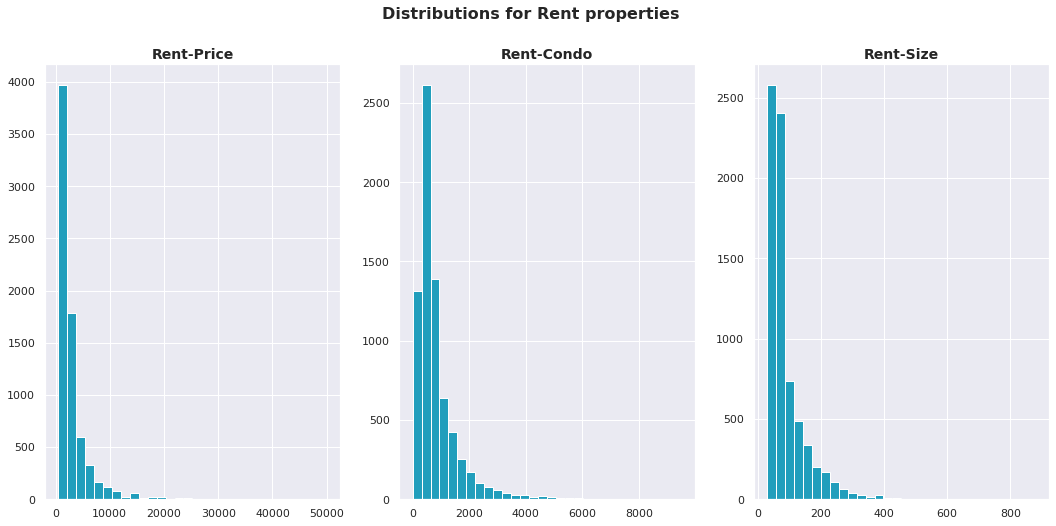

In [48]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
fig.suptitle('Distributions for Rent properties', fontsize=16, fontweight='bold')

axes[0].hist(rent_sp_data['Price'], bins=30, color='#219EBC')
axes[0].set_title('Rent-Price', fontsize=14, fontweight='bold')

axes[1].hist(rent_sp_data['Condo'], bins=30, color='#219EBC')
axes[1].set_title('Rent-Condo', fontsize=14, fontweight='bold')

axes[2].hist(rent_sp_data['Size'],bins=30, color='#219EBC')
axes[2].set_title('Rent-Size', fontsize=14, fontweight='bold')

##Main Characteristics of the propertys

- As we now are working with rent, we can work with price. Thats why we going to plot a graph with bar (for number of properties) and a line (for price) 

In [49]:
#taking the quantity of apartments by number of rooms
#important step to create a bar chart
rent_rooms = rent_sp_data['Rooms'].value_counts()
rent_rooms

2     3267
3     2314
1     1145
4      485
5       13
6        2
7        1
10       1
Name: Rooms, dtype: int64

In [50]:
#here we groupby our data by rooms because we want to take the mean price for each number of rooms in the apartment 
number_rooms_rent = rent_sp_data.groupby('Rooms').mean()
number_rooms_rent

,Price,Condo,Size,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Rooms,,,,,,,,,,,,,
1,2317.171179,532.875983,47.172926,1.576419,0.571179,0.951965,0.292576,0.324017,0.482096,0.002620,-21.178985,-32.440990,50.179965
2,2016.777472,519.602694,65.016529,1.758800,0.730334,1.127946,0.302724,0.138965,0.388736,0.000612,-21.862395,-36.473408,29.716856
3,3723.477096,1075.094209,113.609334,2.462835,1.302939,1.786085,0.301642,0.146500,0.580812,0.000432,-21.938321,-37.387132,30.472096
4,8626.789691,2301.098969,227.781443,3.882474,2.653608,3.125773,0.286598,0.173196,0.725773,0.000000,-21.785308,-41.338940,36.572454
5,12661.538462,2921.692308,383.307692,4.846154,3.923077,4.153846,0.307692,0.076923,0.538462,0.000000,-19.959026,-35.384915,31.245385
6,11000.000000,5000.000000,455.000000,6.500000,3.000000,2.500000,0.500000,0.500000,0.500000,0.000000,-23.585343,-46.694076,25.345000
7,8700.000000,5040.000000,852.000000,6.000000,5.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.210000
10,8000.000000,0.000000,273.000000,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,-23.626021,-46.682821,29.300000


In [51]:
#we going to loop through the the dataset and take the value of each row,
#but how there is no value into 8 and 9 rooms i want to show you how to deal with it 

#here we end our preparation for line plot
price_per_room_rent=[]
for c in range(1,11):
  if c == 8 or c== 9:
    price_per_room_rent.append(0)
  else: 
    price_per_room_rent.append(round(number_rooms_rent['Price'][c],2))
print(price_per_room_rent)

[2317.17, 2016.78, 3723.48, 8626.79, 12661.54, 11000.0, 8700.0, 0, 0, 8000.0]


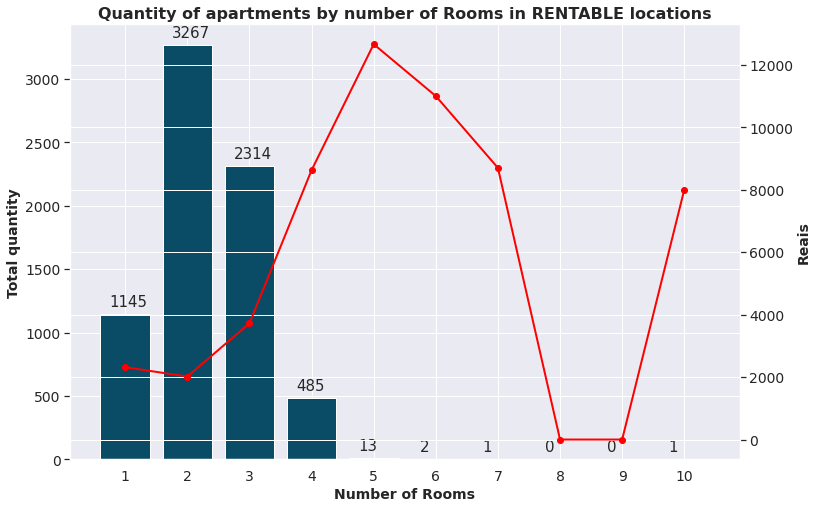

In [52]:
#setting the number of apartments manually
#if you want you could use list cronpehension with an "if" inside to deal with the zeros
rent_number_rooms = [rent_rooms[1], rent_rooms[2], rent_rooms[3], rent_rooms[4], rent_rooms[5], rent_rooms[6], rent_rooms[7], 0, 0, rent_rooms[10]]
rent_numbers= [1,2,3,4,5,6,7,8, 9, 10]

#plotting the chart

fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()     #twinx create another axis that we gonna use to y2

plt.title("Quantity of apartments by number of Rooms in RENTABLE locations", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Rooms', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity', fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais',fontsize=14, fontweight='bold')
ax.set_xticks(ticks=rent_numbers)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

#line plot will follow the second axis (ax2 or "y2")
ax2.plot(rent_numbers, price_per_room_rent, marker='o',color='red',linewidth=2)
#bar plot will follow the ex axis
ax.bar(rent_numbers, rent_number_rooms, color = '#0A4C65')

#setting the number of properties in each bar
for index,data in enumerate(rent_number_rooms):
    ax.text(x=index+0.75 , y =data+60 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

In [53]:
# lets do the same thing as above, but now to number of Suites
number_suites_rent = rent_sp_data.groupby('Suites').mean()
number_suites_rent

,Price,Condo,Size,Rooms,Toilets,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Suites,,,,,,,,,,,,,
0,1755.784257,499.859475,59.760933,1.840233,1.036735,0.915452,0.131778,0.131195,0.309621,0.000583,-19.435108,-21.631040,31.200087
1,2409.103934,671.296156,76.124721,2.253911,2.075324,1.316048,0.360080,0.177023,0.490612,0.001118,-22.662225,-41.491952,32.781357
2,6530.736544,1629.847025,157.937677,3.005666,3.223796,2.413598,0.311615,0.203966,0.730878,0.000000,-22.174319,-39.346348,42.473768
3,7745.711281,1897.575526,185.873805,3.229446,4.185468,2.917782,0.347992,0.258126,0.801147,0.000000,-21.370222,-38.922079,40.608776
4,12609.647799,3226.176101,301.528302,4.044025,5.075472,3.993711,0.226415,0.163522,0.761006,0.000000,-22.256811,-39.931778,42.382516
5,23650.000000,5785.000000,706.750000,5.500000,5.500000,6.500000,0.500000,0.000000,0.750000,0.000000,-17.699438,-34.989018,36.275000


In [54]:
#loop over dataset to get the mean values of each row and but it into a list
#the same code as aboce, but with the "zeros handlin"
price_per_suite_rent=[]
for c in range(0,6):
  price_per_suite_rent.append(round(number_suites_rent['Price'][c],2))
print(price_per_suite_rent)

[1755.78, 2409.1, 6530.74, 7745.71, 12609.65, 23650.0]


In [55]:
#taking the quantity of properties by number of suites  
rent_suites = rent_sp_data['Suites'].value_counts()
rent_suites

1    4474
0    1715
3     523
2     353
4     159
5       4
Name: Suites, dtype: int64

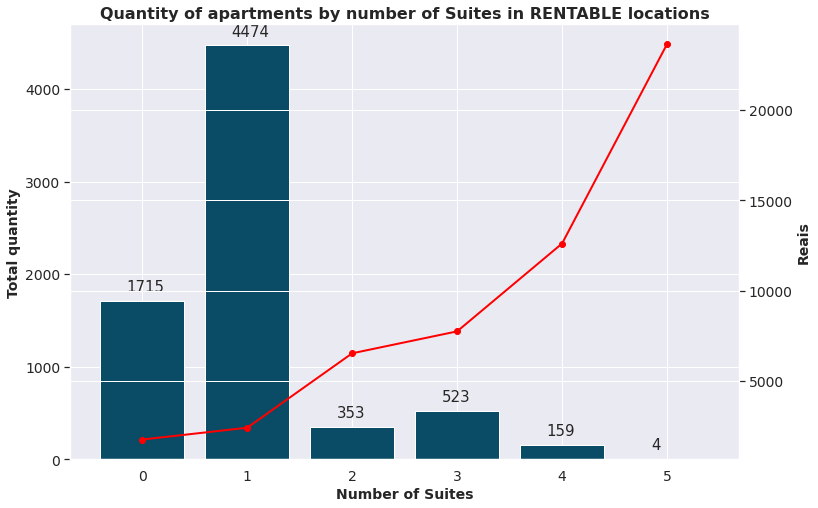

In [56]:
rent_number_suites = [rent_suites[c] for c in range (0,6)]  #using list conprehension to get the values
rent_num = [0,1,2,3,4,5]  #number of rooms in apartments to x-values

fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()   #twinx create another axis that we gonna use to y2

ax.set_title("Quantity of apartments by number of Suites in RENTABLE locations", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Suites', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity',  fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais', fontsize=14, fontweight='bold')
ax.set_xticks(ticks=num)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

#bar plot will follow the ex axis
ax.bar(rent_num, rent_number_suites, color = '#0A4C65')
#line plot will follow the second axis (ax2 or "y2")
ax2.plot(rent_num, price_per_suite_rent, marker='o', color='red',linewidth=2)

#setting the number of properties in each bar
for index,data in enumerate(rent_number_suites):
    ax.text(x=index-0.15 , y =data+100 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [57]:
# lets do the same thing as above, but now to number of Parkiing spaces
number_parking_rent = rent_sp_data.groupby('Parking').mean()
number_parking_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Parking,,,,,,,,,,,,,
0,1819.615646,383.996599,66.302721,1.653061,1.180272,0.170068,0.105442,0.064626,0.115646,0.000000,-19.381463,-20.878067,27.766837
1,1929.322751,515.089947,63.130071,2.014771,1.740520,0.710317,0.304894,0.162698,0.395503,0.000661,-21.825800,-36.421076,32.091510
2,3760.867124,1053.291953,107.633188,2.679351,2.423581,1.252027,0.323768,0.199626,0.672489,0.001871,-21.729905,-37.577960,35.973606
3,6765.947876,1887.528958,176.770270,3.306950,3.604247,2.376448,0.305019,0.204633,0.781853,0.000000,-22.528920,-40.637954,37.586178
4,10620.729858,2726.526066,251.516588,3.606635,4.303318,3.137441,0.265403,0.260664,0.767773,0.000000,-22.246221,-39.275760,42.687204
5,16516.571429,3725.714286,323.714286,3.795918,4.755102,3.469388,0.285714,0.244898,0.836735,0.000000,-22.143303,-37.703825,51.456122
6,20572.727273,6165.545455,496.727273,4.000000,4.909091,3.727273,0.454545,0.000000,0.818182,0.000000,-19.301850,-38.203726,45.766364
7,30333.333333,4666.666667,453.666667,4.333333,5.333333,4.333333,0.000000,0.000000,1.000000,0.000000,-23.558244,-46.621385,68.753333
8,16500.000000,3000.000000,436.500000,7.000000,4.500000,2.500000,0.000000,0.000000,0.000000,0.000000,-23.618392,-46.670390,35.485000


In [58]:
# same as above, getting the data of the mean price to use in line chart 
price_per_parking_rent=[]
for c in range(0,10):
  price_per_parking_rent.append(round(number_parking_rent['Price'][c],2))
print(price_per_suite_rent)

[1755.78, 2409.1, 6530.74, 7745.71, 12609.65, 23650.0]


In [59]:
#getting quantity of apartments by number of parking spaces
rent_parking = rent_sp_data['Parking'].value_counts()
rent_parking

1    4536
2    1603
3     518
0     294
4     211
5      49
6      11
7       3
8       2
9       1
Name: Parking, dtype: int64

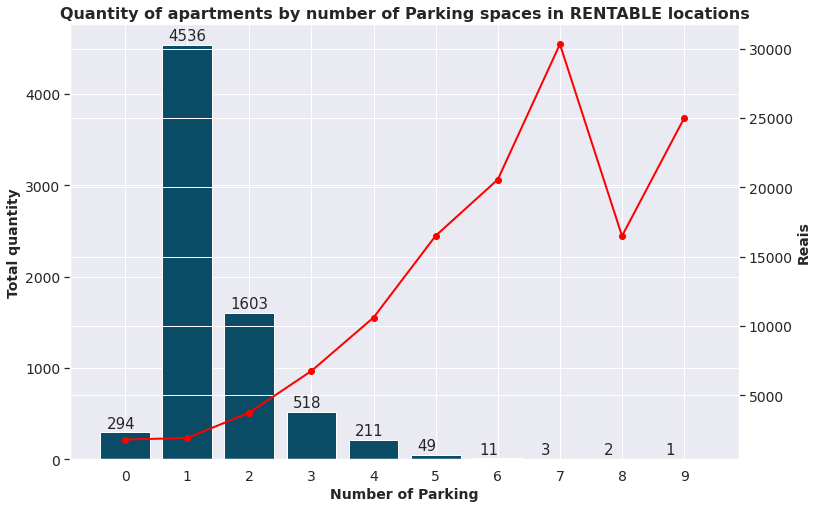

In [60]:
rent_number_parking = [rent_parking[c] for c in range(0,10)]
rent_num = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()    #twinx create another axis that we gonna use to y2

ax.set_title("Quantity of apartments by number of Parking spaces in RENTABLE locations", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Parking', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity',  fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais',  fontsize=14, fontweight='bold')
ax.set_xticks(ticks=num)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

#bar plot will follow the ex axis
ax.bar(rent_num, rent_number_parking, color = '#0A4C65')
#line plot will follow the second axis (ax2 or "y2")
ax2.plot(rent_num, price_per_parking_rent, color='red', marker='o',linewidth=2)

#setting the number of properties in each bar
for index,data in enumerate(rent_number_parking):
    ax.text(x=index-0.3 , y =data+50 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

For binary categories and HeatMap we going to use the same idea of "overview" sections

In [61]:
rent_elevator = rent_sp_data['Elevator'].value_counts()
rent_elevator

0    5061
1    2167
Name: Elevator, dtype: int64

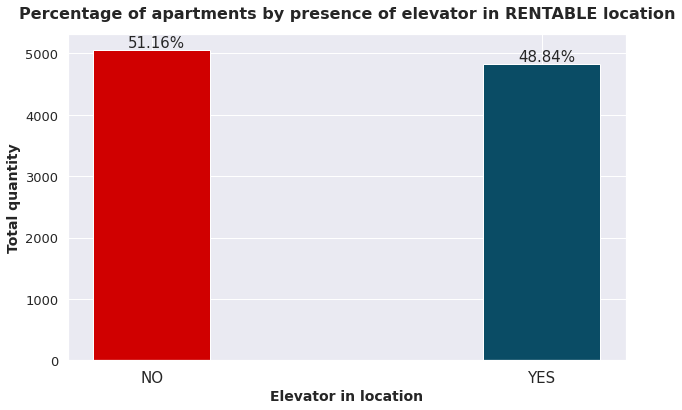

In [62]:
rent_number_elevator = [rent_elevator[0], elevator[1]]
rent_elevator_type = ['NO', 'YES']

plt.figure(figsize=(10,6))

plt.title("Percentage of apartments by presence of elevator in RENTABLE location", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Elevator in location', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(rent_elevator_type, rent_number_elevator, color = ['#D00000','#0A4C65'], width=0.3)
for index,data in enumerate(rent_number_elevator):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(rent_number_elevator)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [63]:
rent_furnished = rent_sp_data['Furnished'].value_counts()
rent_furnished

0    5978
1    1250
Name: Furnished, dtype: int64

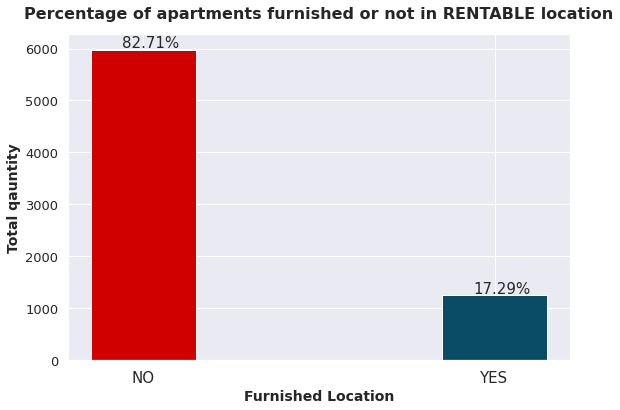

In [64]:
rent_number_furnished= [rent_furnished[c] for c in range(0,2)]
rent_is_furnished = ['NO', 'YES']

plt.figure(figsize=(9,6))

plt.title("Percentage of apartments furnished or not in RENTABLE location", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Furnished Location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(rent_is_furnished, rent_number_furnished, color = ['#D00000','#0A4C65'], width=0.3)
for index,data in enumerate(rent_number_furnished):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(rent_furnished)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [65]:
rent_pool = rent_sp_data['Swimming Pool'].value_counts()
rent_pool

0    3701
1    3527
Name: Swimming Pool, dtype: int64

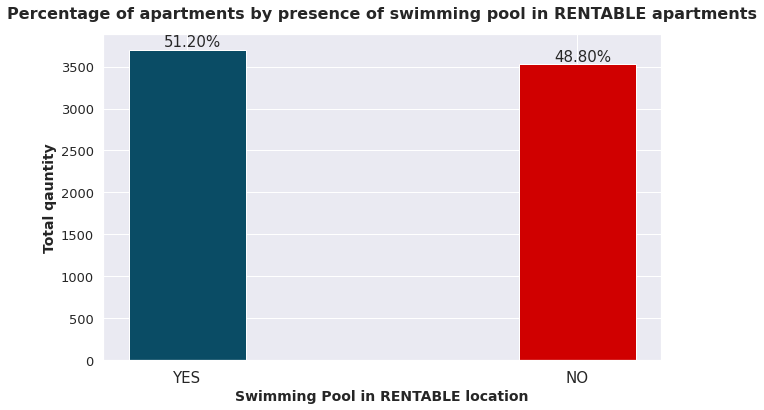

In [66]:
rent_number_pool = [rent_pool[c] for c in range(0,2)]
rent_is_pool = ['YES', 'NO']

plt.figure(figsize=(10,6))

plt.title("Percentage of apartments by presence of swimming pool in RENTABLE apartments", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Swimming Pool in RENTABLE location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(rent_is_pool, rent_number_pool, color = ['#0A4C65', '#D00000'], width=0.3)
for index,data in enumerate(rent_number_pool):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(rent_pool)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()


##Where are Loft's Rentable Apartments located?

Using Heat Map

In [67]:
sp_rent = folium.Map(
    location=[-23.5489, -46.6388]
)

In [68]:
rent_sp_data = geo_sp_data.loc[sp_data['Negotiation Type']=='rent']

locations_rent = rent_sp_data[['Latitude','Longitude']]
location_rent_list = locations_rent.values.tolist()
location_rent_list[0]


[-23.543138, -46.479486]

In [69]:
heat_rent = HeatMap((location_rent_list), min_opcity=0.2, radius=17, blur=15, max_zoom=1)
sp_rent.add_child(heat_rent)
sp_rent

Diving into TOP 6 most populated Districts for Rentable apartments

In [70]:
#taking the first 10 rows (it is alreadyorder by greater to smaller)
rent_district = rent_sp_data['District'].value_counts()[:10]
rent_district

Mooca/São Paulo              174
Moema/São Paulo              158
Morumbi/São Paulo            152
Vila Mariana/São Paulo       146
Vila Leopoldina/São Paulo    144
Pinheiros/São Paulo          139
Cambuci/São Paulo            138
Itaim Bibi/São Paulo         137
Campo Grande/São Paulo       135
Butantã/São Paulo            133
Name: District, dtype: int64

In [71]:
#setting values malually just for visualization (could be done with list conprehension)
rent_popular_districts = [178,163,161,159,153,153,152,148,144,141]
rent_districts_labels = ['Mooca','Moema','Vila Mariana','Morumbi','Pinheiros','Cambuci','Butatã','Vila Leopoldina','Itaim Bibi', 'Ipiranga']

In [72]:
#grouping by districts we can get the mean value of features like price and Reais/square_meter
price_district_rent = rent_sp_data.groupby('District').mean()
price_district_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
District,,,,,,,,,,,,,,
Alto de Pinheiros/São Paulo,7825.816000,2068.440000,165.576000,2.880000,2.872000,1.616000,2.368000,0.296000,0.160000,0.584000,0.0,-23.546026,-46.712373,44.364000
Anhanguera/São Paulo,2670.512821,500.461538,72.487179,2.205128,2.282051,1.153846,1.333333,0.666667,0.282051,0.641026,0.0,-23.523214,-46.654257,36.057692
Aricanduva/São Paulo,1401.289474,470.078947,57.236842,2.105263,1.763158,0.763158,1.236842,0.342105,0.078947,0.157895,0.0,-23.547683,-46.530214,25.535789
Artur Alvim/São Paulo,991.800000,105.280000,53.620000,1.920000,1.860000,0.860000,1.000000,0.040000,0.020000,0.000000,0.0,-23.545235,-46.488702,18.905000
Barra Funda/São Paulo,2927.621212,711.772727,72.530303,2.000000,1.742424,0.727273,1.121212,0.257576,0.227273,0.742424,0.0,-23.523734,-46.661283,43.122424


In [73]:
#this variable will be used to get the first and last districts acording to the price
rent_districts_loop = rent_district.keys()

In [74]:
#as we want to extract the price from the main districts of that dataset we'll find the
#corresponding district in rent_districts_loop, and then we extract the mean price of that district
price_top10_district_rent = []
for top_district in rent_districts_loop:
  for district in price_district_rent.index:
    if top_district == district:
      price_top10_district_rent.append(round(price_district_rent['Price'][district],2))
print(price_top10_district_rent)


[2305.52, 7648.88, 3530.07, 4943.97, 4764.18, 5834.37, 2113.41, 8634.58, 2817.56, 1819.74]


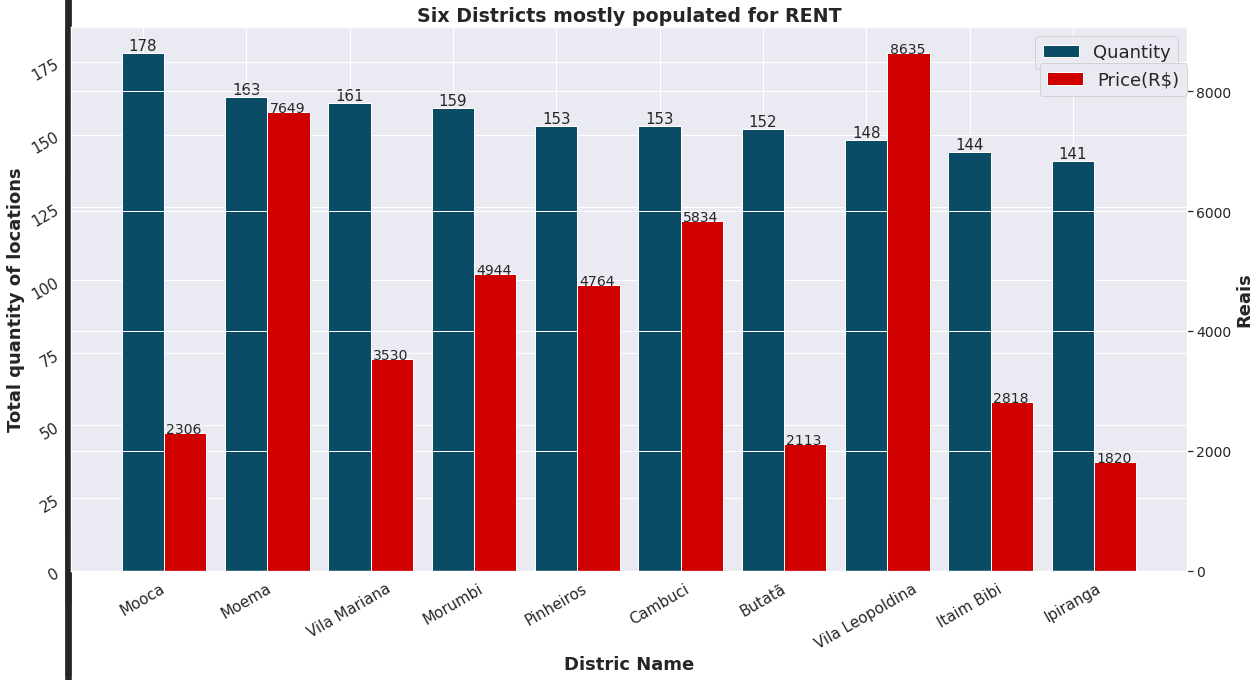

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()        #twinx create another axis that we gonna use to y2

x_index = np.arange(len(rent_districts_labels))*2.2  #x_index its usefull to set both bars in just one district
width = 0.9

ax.set_title("Six Districts mostly populated for RENT", fontsize=19, fontweight='bold')
ax.set_xlabel('Distric Name', fontsize=18, fontweight='bold')
ax.set_ylabel('Total quantity of locations', fontsize=18, fontweight='bold')
ax.set_xticks(x_index)
ax.set_xticklabels((rent_districts_labels))
ax2.set_ylabel('Reais',fontsize=18, fontweight='bold')
ax.tick_params(labelsize=15, rotation=30,width='501')
ax2.tick_params(labelsize=14)

#the firts bar respects the ax axis
ax.bar(x_index, rent_popular_districts, color = '#0A4C65', width=width, label='Quantity')
#the second bar respects the ax2 axis
ax2.bar(x_index+width,price_top10_district_rent, color='#D00000', width=width, label='Price(R$)')

#setting number of properties above blue bar
for index,data in enumerate(rent_popular_districts):
    ax.text(x=(index*2.2)-0.3 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
#setting the mean price above each district (above the bar) 
for index,price in enumerate(price_top10_district_rent):
    ax2.text(x=(index*2.2)+0.5 , y =price+1 , s=f"{int(round(price,0))}" , fontdict=dict(fontsize=14))

ax.legend(loc=0, fontsize=18)  #setting the position of the first label
ax2.legend(fontsize=18, bbox_to_anchor=(0.86,0.95))  #setting the position manually of the second label

plt.show()

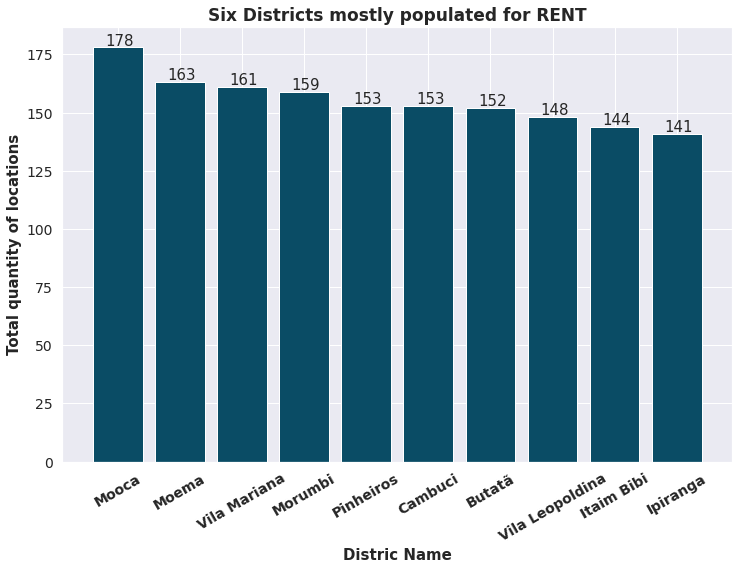

In [76]:
#setting the values manually
rent_popular_districts = [178,163,161,159,153,153,152,148,144,141]
rent_districs_labels = ['Mooca','Moema','Vila Mariana','Morumbi','Pinheiros','Cambuci','Butatã','Vila Leopoldina','Itaim Bibi', 'Ipiranga']

#plotting bar chart
plt.figure(figsize=(12,8))

plt.title("Six Districts mostly populated for RENT", fontsize=17, fontweight='bold')
plt.xlabel('Distric Name', fontsize=15, fontweight='bold')
plt.ylabel('Total quantity of locations', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=30, fontweight='bold')
plt.yticks(fontsize='14')

plt.bar(rent_districs_labels, rent_popular_districts, color = '#0A4C65')

#setting the number of properties above each bar(district)
for index,data in enumerate(rent_popular_districts):
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

## Understanding Price per Area

- Which districts are expensive and which of them are cheap ?

A very simple way to visualize it is using geopandas library. It will only need a JSON o GEOJSON file with geographic coordinates of the place that you want to see. In our case: São Paulo

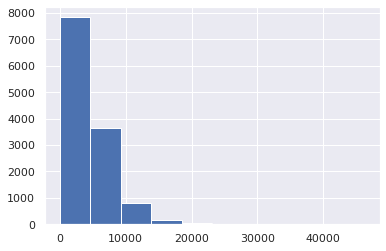

In [77]:
#lets take a look on the distribution of this feature
geo_sp_data['Reais/square_meter'].hist()

In [78]:
#as we want to plot a scatter plot by latitude, longitude and Reais/square_meter outliers will make some noise, so let's cut them
final_sp_data = geo_sp_data[geo_sp_data['Reais/square_meter'] < 20000]

In [79]:
#creating one dataframe for rent and other for sale
rent_final_sp_data = final_sp_data[final_sp_data['Negotiation Type']=='rent']
#sale will be used latter, in the next section
sale_final_sp_data = final_sp_data[final_sp_data['Negotiation Type']=='sale']


In [80]:
#loading a geopandas map
sp_geo=geopandas.read_file('/content/sp_metrop.geojson')
sp_geo.head()

,ID,COLOR,LAYER,AREA_M2,AREA_KM2,geometry
0,2,#A0A0A0,Zona Urbana,43758.16,0.04,"POLYGON ((-46.77025 -23.81015, -46.77188 -23.8..."
1,3,#A0A0A0,Zona Urbana,8675656.19,8.68,"POLYGON ((-46.69569 -23.82675, -46.69571 -23.8..."
2,4,#A0A0A0,Zona Urbana,3072912.79,3.07,"POLYGON ((-46.68779 -23.85739, -46.68797 -23.8..."
3,5,#A0A0A0,Zona Urbana,1246957.82,1.25,"POLYGON ((-46.74785 -23.83890, -46.74796 -23.8..."
4,6,#A0A0A0,Zona Urbana,1146299.74,1.15,"POLYGON ((-46.63484 -23.88573, -46.63774 -23.8..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


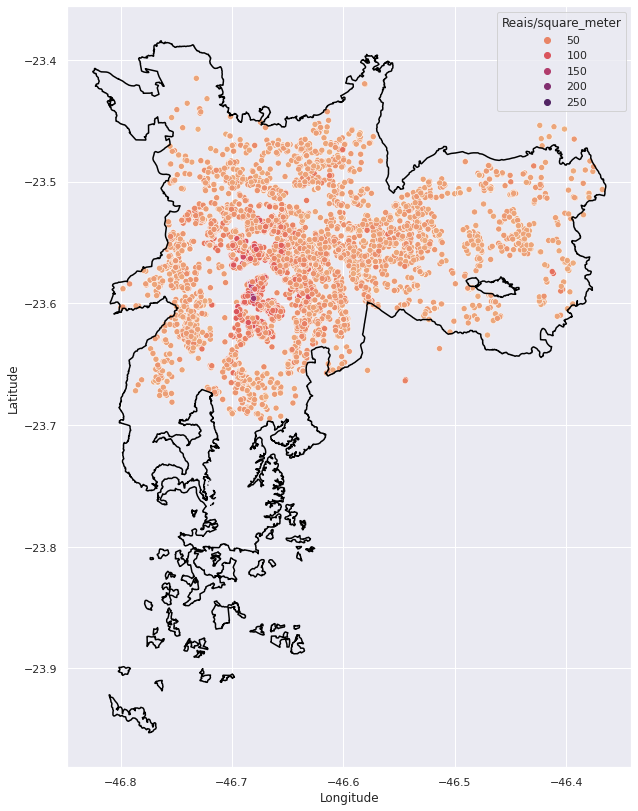

In [81]:
#plotting the map boundary (urban zone of São Paulo)
sp_geo.boundary.plot(color='Black',edgecolor='White', figsize=(20,14))

#aboce this map we will plot a scatter plot with de coordinates of each apartment 
#they will be marked with diferrent collors to show different prices per size of the apartments
sns.scatterplot(rent_final_sp_data['Longitude'], rent_final_sp_data['Latitude'], hue=rent_final_sp_data['Reais/square_meter'],palette='flare')


We can see clearly that the central zone of the city, mainly neighbourhoods like Vila Olimpia and Itaim Bibi are realy expensive. And the west zone of the city has cheaper prices per size (neighbourhoods like Guaianazes). 

Using a heatmap. (Explaned before on "Overview")

In [82]:
sp_rent = folium.Map(
    location=[-23.5489, -46.6388]
)

In [83]:
rent_sp_data = geo_sp_data.loc[sp_data['Negotiation Type']=='rent']

locations_rent = rent_sp_data[['Latitude','Longitude']]
location_rent_list = locations_rent.values.tolist()
location_rent_list[0]

[-23.543138, -46.479486]

In the next HeatMap we can see a pretty homogeneous distribution of apartments avainable for rent. However, there is a concentraded area in the central zone of the city.

In [84]:
heat_rent = HeatMap((location_rent_list), min_opcity=0.2, radius=17, blur=15, max_zoom=1)
sp_rent.add_child(heat_rent)
sp_rent

TOP 10 cheaper and TOP 10 more expensive neighbourhoods in the city by square meter 

In [85]:
#groupingby district helps us a lot beacouse we can already take the meanprice of the Reais/square_meter feature
district_rent_df = rent_sp_data.groupby('District').mean().sort_values(by='Reais/square_meter') #order by Reais/square_meter
district_rent_df.head(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
District,,,,,,,,,,,,,,
Jardim São Luis/São Paulo,1040.000000,460.000000,59.000000,2.000000,1.000000,0.000000,1.00000,0.000000,0.00000,0.00000,0.0,-23.654775,-46.744826,17.630000
José Bonifácio/São Paulo,948.309524,114.166667,54.142857,2.190476,1.857143,0.857143,1.02381,0.071429,0.02381,0.02381,0.0,-23.545963,-46.438716,17.695476


In [86]:
#taking a look in the shape helps us to understand the new dataframe. Usefull in the next step
district_rent_df.shape

(92, 14)

In [87]:

distric_rent = district_rent_df.index.tolist()  #putting al district names into a list
low_district_rent = distric_rent[:][:10]        #taking the first 10 districts(cheaper ones)
high_district_rent = distric_rent[:][82:92]     #taking the last 10 districts (expensive ones)

#doing the same thing as above but with Reais/square_meter
price_rent = district_rent_df['Reais/square_meter'].tolist()
low_price_rent = price_rent[:][:10]
high_price_rent = price_rent[:][82:92]

#make sure they all have the same length to plot the data 
print(len(low_district_rent))
print(len(high_district_rent))
print(len(low_price_rent))
print(len(high_price_rent ))

10
10
10
10


In [88]:
#lets make a Dataframe with those variable to better understand and visualization
bar_sp_rent = pd.DataFrame({'low_district': low_district_rent, 'low_price': low_price_rent,
                            'high_district': high_district_rent, 'high_price': high_price_rent})
#sorting by low price
bar_sp_rent =bar_sp_rent.sort_values('low_price',ascending=False)

In [89]:
bar_sp_rent.head()

,low_district,low_price,high_district,high_price
9,Jardim Ângela/São Paulo,20.109500,Iguatemi/São Paulo,81.996889
8,Jardim Helena/São Paulo,19.847917,Vila Olimpia/São Paulo,80.081818
7,Ponte Rasa/São Paulo,19.457778,Itaim Bibi/São Paulo,75.806131
6,Jaçanã/São Paulo,19.161944,Brooklin/São Paulo,61.750400
5,Artur Alvim/São Paulo,18.905000,Pinheiros/São Paulo,61.026619


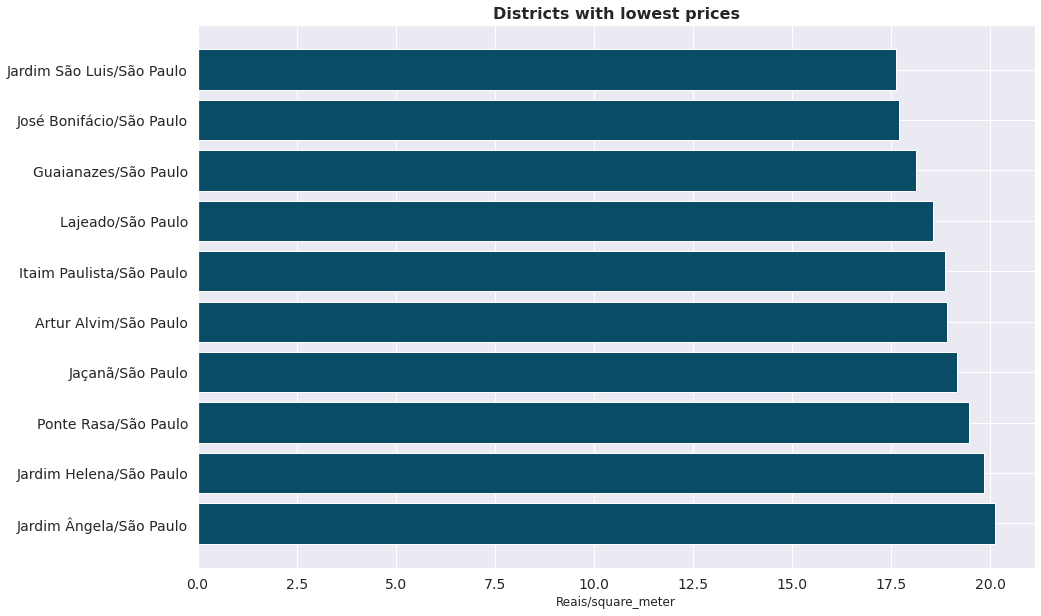

In [90]:
plt.figure(figsize=(15,10))

plt.title('Districts with lowest prices', fontsize=16, fontweight='bold')
plt.xlabel('Reais/square_meter')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.barh(bar_sp_rent['low_district'], bar_sp_rent['low_price'], color='#0A4C65')
plt.show()

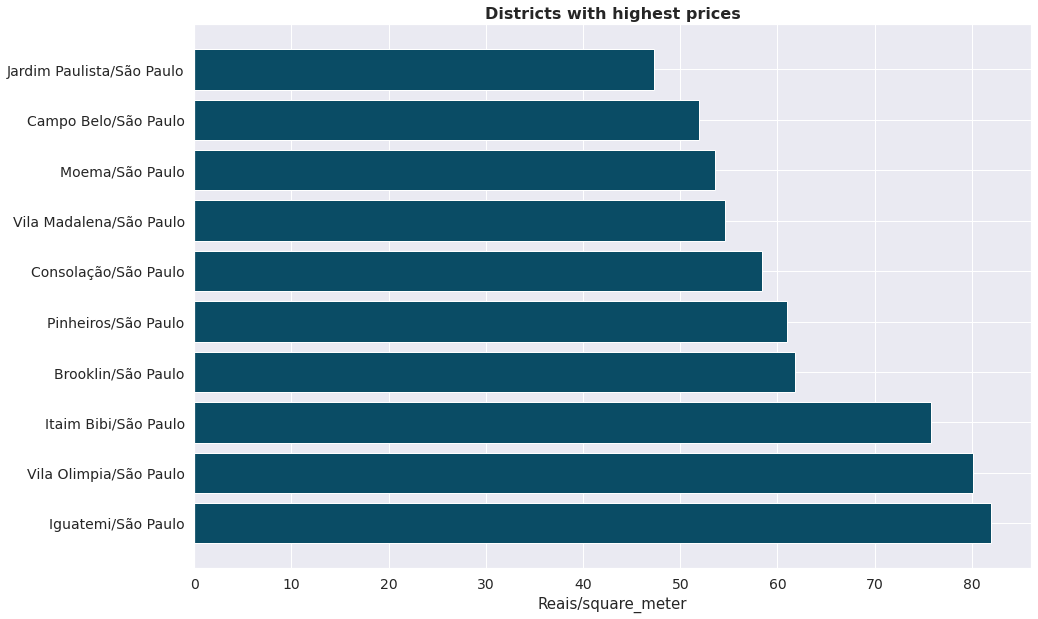

In [91]:
plt.figure(figsize=(15,10))

plt.title('Districts with highest prices', fontsize=16, fontweight='bold')
plt.xlabel('Reais/square_meter', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.barh(bar_sp_rent['high_district'], bar_sp_rent['high_price'], color='#0A4C65')
plt.show()

## What determine price? 

First we'll look at the feature's correlations with Price

Then we'll going to use a DecisonTree algorithm to found the main features that impact in price

In [92]:
#firts let's create a dataframe for properly manupulation
rent_sp_data_tree = rent_sp_data.drop(['Property Type', 'Negotiation Type'],axis=1).copy()
rent_sp_data_tree.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude,Reais/square_meter
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486,19.79
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718,22.22
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665,20.83


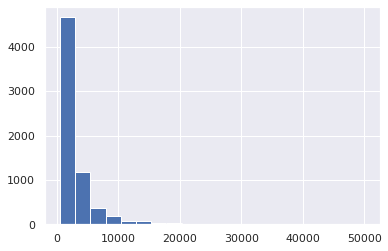

In [93]:
#price distribution. Right skewed distributions, tend to have outliers in these case 
rent_sp_data_tree['Price'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


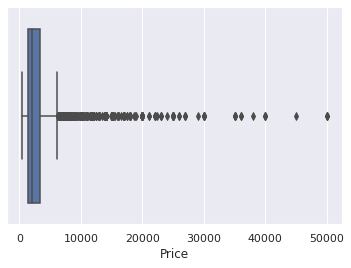

In [94]:
#another way to visualize it is using a boxplot
#the dots outside of theh box are considered outliers.
sns.boxplot(rent_sp_data_tree['Price'])

In [95]:
#cutting any value above 15000 Reais 
rent_sp_data_tree = rent_sp_data_tree.loc[rent_sp_data_tree['Price']<15000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


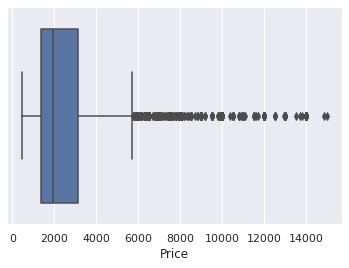

In [96]:
#now we can see that the distribution have a better shape. There is still outliers, but its better
sns.boxplot(rent_sp_data_tree['Price'])

In [97]:
#when we are looking for linear correlation we can use the pearson correlation
rent_sp_data_tree.corr().loc['Price', :].sort_values(ascending=False)

Price                 1.000000
Size                  0.702339
Condo                 0.660621
Parking               0.616140
Toilets               0.600607
Suites                0.594152
Reais/square_meter    0.534708
Rooms                 0.396485
Swimming Pool         0.253623
Furnished             0.200212
Elevator              0.029606
New                  -0.010495
Latitude             -0.167443
Longitude            -0.281152
Name: Price, dtype: float64

- It seems the Size have a great positive correlation with Price. Condo price have also a good correlation.

- As long the Longitude increases the price decreases.  


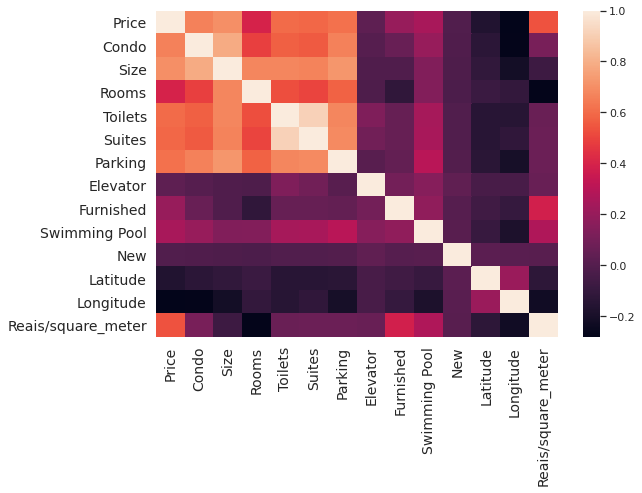

In [98]:
# to visualize those correlation lets use the seaborn correlation plot
plt.figure(figsize=(9,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(rent_sp_data_tree.corr())

Now we want to encode the only categorical variable in our dataset: District

In [99]:
#lets see how much of the data can be taken by 45 districts 
sum(rent_sp_data_tree['District'].value_counts()[0:45]) / sum(rent_sp_data_tree['District'].value_counts())

0.7339449541284404

In [100]:
rent_sp_data_tree['District'].value_counts()[0:45]

Mooca/São Paulo                174
Morumbi/São Paulo              151
Vila Leopoldina/São Paulo      144
Cambuci/São Paulo              138
Vila Mariana/São Paulo         137
Pinheiros/São Paulo            136
Campo Grande/São Paulo         135
Moema/São Paulo                135
Butantã/São Paulo              133
Ipiranga/São Paulo             131
Saúde/São Paulo                125
Campo Belo/São Paulo           123
Itaim Bibi/São Paulo           120
Perdizes/São Paulo             119
Vila Prudente/São Paulo        119
Jardim Paulista/São Paulo      117
Brás/São Paulo                 114
Jabaquara/São Paulo            110
Tatuapé/São Paulo              110
Lapa/São Paulo                 108
Santo Amaro/São Paulo          105
Alto de Pinheiros/São Paulo    105
Freguesia do Ó/São Paulo       104
Pirituba/São Paulo             102
Bela Vista/São Paulo           100
Carrão/São Paulo               100
Limão/São Paulo                 99
Vila Andrade/São Paulo          98
Jaguaré/São Paulo   

In [101]:
#getting the keys(names) of the first 45 districts
rent_45 = rent_sp_data_tree['District'].value_counts()[0:45].keys()

In [102]:
cont = 46    #the cont will decreases one per loop
for i in rent_45:  
  print(i)
  cont = cont - 1
  print(cont)
  for index, c in enumerate(rent_sp_data_tree['District']):     #geting the index and the data of each districts
    if i == c:   #if the data is equal to the district we change the number of apartments by the cont value
      rent_sp_data_tree['District'] = np.where(rent_sp_data_tree['District'] == i, str(cont), rent_sp_data_tree['District'])

Mooca/São Paulo
45
Morumbi/São Paulo
44
Vila Leopoldina/São Paulo
43
Cambuci/São Paulo
42
Vila Mariana/São Paulo
41
Pinheiros/São Paulo
40
Campo Grande/São Paulo
39
Moema/São Paulo
38
Butantã/São Paulo
37
Ipiranga/São Paulo
36
Saúde/São Paulo
35
Campo Belo/São Paulo
34
Itaim Bibi/São Paulo
33
Perdizes/São Paulo
32
Vila Prudente/São Paulo
31
Jardim Paulista/São Paulo
30
Brás/São Paulo
29
Jabaquara/São Paulo
28
Tatuapé/São Paulo
27
Lapa/São Paulo
26
Santo Amaro/São Paulo
25
Alto de Pinheiros/São Paulo
24
Freguesia do Ó/São Paulo
23
Pirituba/São Paulo
22
Bela Vista/São Paulo
21
Carrão/São Paulo
20
Limão/São Paulo
19
Vila Andrade/São Paulo
18
Jaguaré/São Paulo
17
Vila Sônia/São Paulo
16
Consolação/São Paulo
15
Liberdade/São Paulo
14
Brooklin/São Paulo
13
Belém/São Paulo
12
Tucuruvi/São Paulo
11
Santana/São Paulo
10
Sacomã/São Paulo
9
Penha/São Paulo
8
Casa Verde/São Paulo
7
Mandaqui/São Paulo
6
Rio Pequeno/São Paulo
5
São Lucas/São Paulo
4
Santa Cecília/São Paulo
3
Barra Funda/São Paulo
2


In [103]:
#transforming every value into numeric(int)
rent_sp_data_tree['District'] = pd.to_numeric(rent_sp_data_tree['District'], errors='coerce')   #'coerce' just leave non-numerical data as NaN
#Fill NaN values with zero
rent_sp_data_tree['District'] = rent_sp_data_tree['District'].fillna('0')

In [104]:
 rent_sp_data_tree['District'].value_counts()

0       1740
45.0     174
44.0     151
43.0     144
42.0     138
41.0     137
40.0     136
39.0     135
38.0     135
37.0     133
36.0     131
35.0     125
34.0     123
33.0     120
32.0     119
31.0     119
30.0     117
29.0     114
28.0     110
27.0     110
26.0     108
25.0     105
24.0     105
23.0     104
22.0     102
21.0     100
20.0     100
19.0      99
18.0      98
17.0      96
16.0      96
15.0      93
14.0      92
13.0      92
12.0      91
11.0      89
10.0      82
9.0       81
8.0       81
7.0       79
6.0       77
5.0       77
4.0       75
3.0       75
2.0       66
1.0       66
Name: District, dtype: int64

In [105]:
#deviding the dataset to train a model and then test it
x_train_rent, x_test_rent, y_train_rent, y_test_rent = train_test_split(rent_sp_data_tree.drop(['Price', 'Reais/square_meter'],axis=1), rent_sp_data_tree['Price'],
                                                    test_size=0.25, random_state=42)

In [106]:
#as we want the feature importances we're goint to use DecisionTree
#because of it we're going to set a list of hyperparameters values to use in GridSearch
n_leafs = [1, 2, 3, 4, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
param_grid_tree = [{'max_depth':depths,
              'min_samples_leaf':n_leafs}]

In [107]:
#using GridSearch we'll find the best combinations of the hyperparameters that we choosed to the model
gd_tree = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid_tree, scoring= 'neg_mean_squared_error', cv=10)
best_decisiontree = gd_tree.fit(x_train_rent, y_train_rent)
print(best_decisiontree.best_params_) 

{'max_depth': 13, 'min_samples_leaf': 20}


In [108]:
#building the best model with those datas and parameters
#as we are using DecisionTree we won't normalize the data, usually that's not good with DecisonTree
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=20)
tree_model = tree.fit(x_train_rent, y_train_rent)
tree_predict = tree_model.predict(x_test_rent)
tree_mse = mean_squared_error(y_test_rent, tree_predict)
tree_rmse = np.sqrt(tree_mse)
importances = tree_model.feature_importances_

print(f'Root Mean Squared Error: {tree_rmse:.2f}')
print('---------------------------')
for i,c in enumerate(importances):
	print(f'Feature: {i}, Score: {c:.3f}')

Root Mean Squared Error: 1363.27
---------------------------
Feature: 0, Score: 0.099
Feature: 1, Score: 0.602
Feature: 2, Score: 0.001
Feature: 3, Score: 0.000
Feature: 4, Score: 0.045
Feature: 5, Score: 0.006
Feature: 6, Score: 0.000
Feature: 7, Score: 0.013
Feature: 8, Score: 0.016
Feature: 9, Score: 0.000
Feature: 10, Score: 0.004
Feature: 11, Score: 0.070
Feature: 12, Score: 0.145


In [109]:
#saving column names into a list
rent_features =['Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool','New','District','Latitude',	'Longitude']

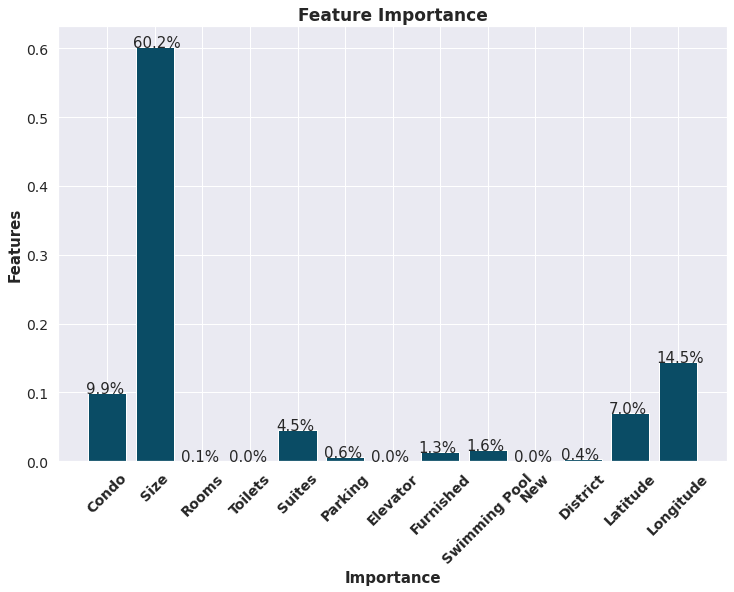

In [110]:
#plotting fature importance for each feature (column name)
plt.figure(figsize=(12,8))

plt.title("Feature Importance", fontsize=17, fontweight='bold')
plt.xlabel('Importance', fontsize=15, fontweight='bold')
plt.ylabel('Features', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=45, fontweight='bold')
plt.yticks(fontsize='14')

plt.bar(rent_features, importances, color='#0A4C65')
for index,data in enumerate(importances):
    plt.text(x=index-0.45 , y =data , s=f"{round(data*100,1)}%" , fontdict=dict(fontsize=15))
plt.show()

As we can see Size has a great effct in the Price value. Also the Latitude adn the Longitude are really relevant too, showing the importance of the apartment's location (District didn't look that important because our encoding didn't help on it)

#Saleable Loft's Location

- Th most part of the code here is pretty similar to the "Rentable" step. That's why the code have no comments (except in necessary ocasions)

- Here we can see the differences between the rentable apartments and that properties to sale.

##Selecting only apartments available for sale

In [111]:
sale_sp_data = sp_data.loc[sp_data['Negotiation Type']=='sale']

In [112]:
sale_sp_data.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Reais/square_meter
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244,9900.00
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106,12134.15
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594,10285.71


##Distribution

Text(0.5, 1.0, 'Sale-Size')

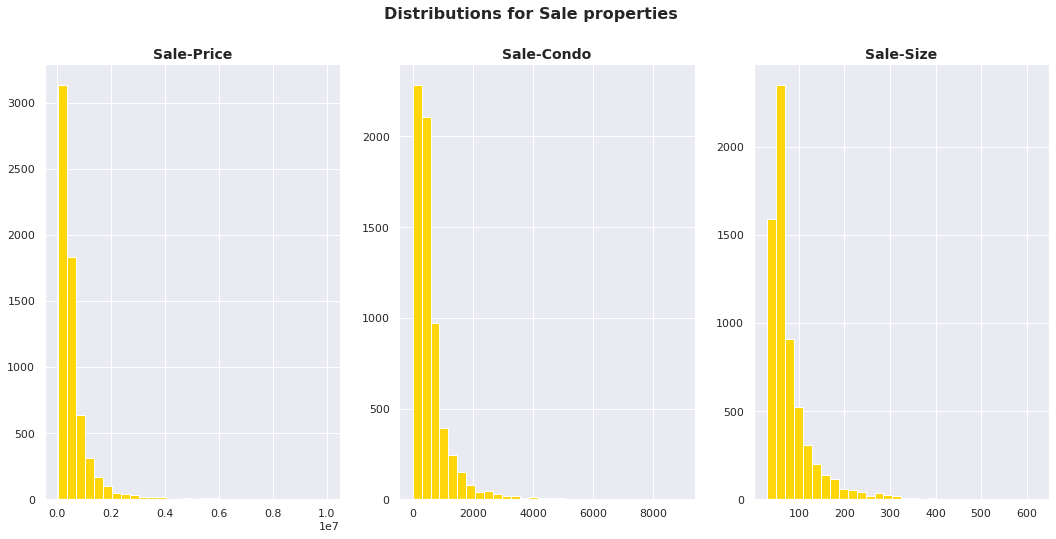

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
fig.suptitle('Distributions for Sale properties', fontsize=16, fontweight='bold')

axes[0].hist(sale_sp_data['Price'], bins=30, color='#FFD60A')
axes[0].set_title('Sale-Price', fontsize=14, fontweight='bold')

axes[1].hist(sale_sp_data['Condo'], bins=30, color='#FFD60A')
axes[1].set_title('Sale-Condo', fontsize=14, fontweight='bold')

axes[2].hist(sale_sp_data['Size'],bins=30, color='#FFD60A')
axes[2].set_title('Sale-Size', fontsize=14, fontweight='bold')

##Main Characteristics of the propertys

In [114]:
number_rooms_sale = sale_sp_data.groupby('Rooms').mean()
number_rooms_sale

,Price,Condo,Size,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Rooms,,,,,,,,,,,,,
1,3.844636e+05,405.028571,45.473950,1.534454,0.522689,0.853782,0.364706,0.157983,0.497479,0.025210,-21.377915,-34.000477,8451.099277
2,3.731998e+05,350.806516,58.313232,1.732495,0.715061,1.062304,0.396685,0.094027,0.460131,0.039154,-21.267211,-35.532200,6007.107588
3,8.127586e+05,732.416458,103.445559,2.407426,1.173608,1.663823,0.440542,0.145509,0.655294,0.020572,-22.008254,-39.497970,7400.257225
4,2.295038e+06,1576.331230,203.889590,3.958991,2.523659,2.965300,0.558360,0.110410,0.760252,0.044164,-21.342183,-38.502983,10474.367508
5,1.862857e+06,2160.000000,254.571429,4.428571,2.142857,3.000000,0.571429,0.571429,0.714286,0.000000,-20.189863,-18.998612,7555.884286
6,7.521000e+06,2500.000000,377.000000,7.000000,6.000000,4.000000,0.000000,0.000000,1.000000,0.000000,-23.549506,-46.717449,19949.600000


In [115]:

price_per_rooms_sale=[]
for c in range(1,7):
  price_per_rooms_sale.append(round(number_rooms_sale['Price'][c],2))
print(price_per_rooms_sale)

[384463.63, 373199.84, 812758.56, 2295038.08, 1862857.14, 7521000.0]


In [116]:
sale_rooms= sale_sp_data['Rooms'].value_counts()
sale_rooms

2    3499
3    1993
1     595
4     317
5       7
6       1
Name: Rooms, dtype: int64

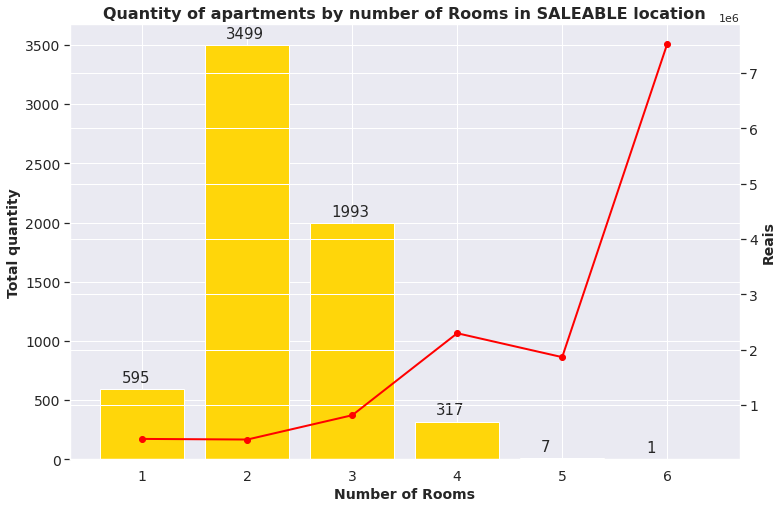

In [117]:
sale_number_rooms = [sale_rooms[c] for c in range(1,7)]
sale_num = [1,2,3,4,5,6]

fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()

ax.set_title("Quantity of apartments by number of Rooms in SALEABLE location", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Rooms', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity',  fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais',  fontsize=14, fontweight='bold')
ax.set_xticks(ticks=num)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax.bar(sale_num, sale_number_rooms, color = '#FFD60A')
ax2.plot(sale_num, price_per_rooms_sale, color='red', marker='o',linewidth=2)
for index,data in enumerate(sale_number_rooms):
    ax.text(x=index+0.80 , y =data+60 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [118]:
number_suites_sale = sale_sp_data.groupby('Suites').mean()
number_suites_sale


,Price,Condo,Size,Rooms,Toilets,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Suites,,,,,,,,,,,,,
0,3.386507e+05,351.103185,57.437580,1.949045,1.054777,0.870701,0.200637,0.066879,0.301911,0.055414,-19.201350,-21.839299,5861.009777
1,5.023142e+05,481.885340,71.856496,2.317998,2.098927,1.283433,0.475328,0.130155,0.587604,0.024791,-22.377395,-41.933330,6700.358889
2,1.403915e+06,1142.531496,139.531496,2.925197,3.358268,2.228346,0.531496,0.188976,0.767717,0.019685,-21.992172,-37.631528,10019.549606
3,1.784869e+06,1260.993421,171.832237,3.273026,4.230263,2.710526,0.559211,0.144737,0.832237,0.036184,-20.855728,-41.067178,10018.758618
4,4.055599e+06,2235.238636,277.090909,4.011364,5.215909,4.102273,0.568182,0.102273,0.806818,0.000000,-22.245875,-38.346490,14418.099432
6,7.521000e+06,2500.000000,377.000000,6.000000,7.000000,4.000000,0.000000,0.000000,1.000000,0.000000,-23.549506,-46.717449,19949.600000


In [119]:
sale_suites = sale_sp_data['Suites'].value_counts()
sale_suites

1    4195
0    1570
3     304
2     254
4      88
6       1
Name: Suites, dtype: int64

In [120]:
price_per_suite_sale=[]
for c in range(0,7):
  if c == 5:
    price_per_suite_sale.append(0)
  else:
    price_per_suite_sale.append(round(number_suites_sale['Price'][c],2))
print(price_per_rooms_sale)

[384463.63, 373199.84, 812758.56, 2295038.08, 1862857.14, 7521000.0]


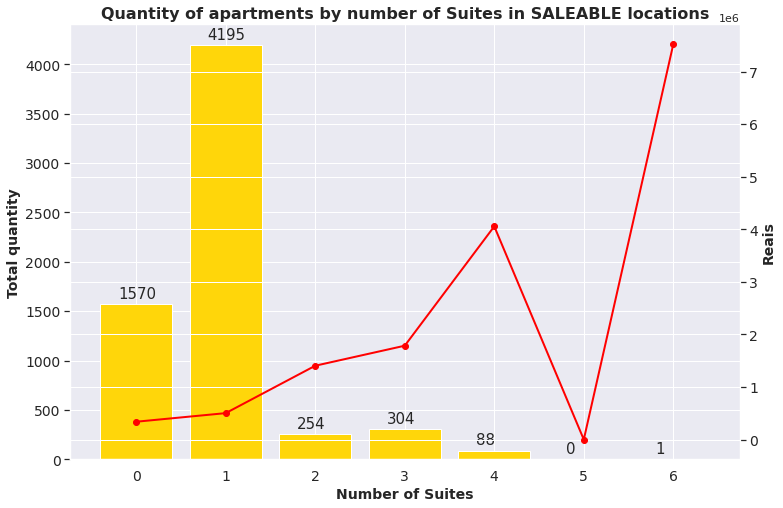

In [121]:
sale_number_suites = [sale_suites[0],sale_suites[1],sale_suites[2],sale_suites[3],sale_suites[4],0,sale_suites[6]] 
sale_num = [0,1,2,3,4,5,6]

fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()

ax.set_title("Quantity of apartments by number of Suites in SALEABLE locations", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Suites', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity',  fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais',  fontsize=14, fontweight='bold')
ax.set_xticks(ticks=num)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax.bar(sale_num, sale_number_suites, color = '#FFD60A')
ax2.plot(sale_num, price_per_suite_sale, color='red', marker='o',linewidth=2)
for index,data in enumerate(sale_number_suites):
    ax.text(x=index-0.2 , y =data+60 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [122]:

number_parking_sale = sale_sp_data.groupby('Parking').mean()
number_parking_sale


,Price,Condo,Size,Rooms,Toilets,Suites,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
Parking,,,,,,,,,,,,,
0,2.952830e+05,321.492754,54.166667,1.652174,1.094203,0.050725,0.253623,0.061594,0.126812,0.043478,-18.260939,-16.029434,5586.473732
1,3.817050e+05,381.632821,61.170983,2.106807,1.759569,0.724501,0.390099,0.099014,0.468485,0.032776,-21.471460,-36.666923,6124.406711
2,8.585449e+05,765.392414,102.105762,2.805981,2.531729,1.258206,0.500365,0.171408,0.765135,0.035011,-22.149893,-40.930545,8306.217877
3,1.701615e+06,1359.108787,168.790795,3.238494,3.652720,2.301255,0.476987,0.171548,0.815900,0.012552,-21.689708,-36.446343,9957.614226
4,3.210436e+06,1798.338235,247.625000,3.735294,4.558824,3.198529,0.617647,0.176471,0.845588,0.000000,-22.544895,-40.198050,12664.786544
5,5.295211e+06,3027.695652,312.000000,3.869565,4.695652,3.347826,0.260870,0.130435,0.826087,0.000000,-21.525715,-33.920774,16799.687826
6,2.653567e+06,0.000000,242.333333,3.666667,3.333333,2.333333,0.666667,0.000000,0.666667,0.333333,-23.517559,-46.637499,10711.540000
7,5.500000e+06,3300.000000,307.000000,4.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-23.537225,-46.669922,17915.310000


In [123]:
price_per_parking_sale=[]
for c in range(0,8):
  price_per_parking_sale.append(round(number_parking_sale['Price'][c],2))
print(price_per_parking_sale)

[295283.04, 381705.02, 858544.91, 1701614.98, 3210435.65, 5295210.74, 2653566.67, 5500000.0]


In [124]:
sale_parking = sale_sp_data['Parking'].value_counts()
sale_parking

1    4363
2    1371
0     276
3     239
4     136
5      23
6       3
7       1
Name: Parking, dtype: int64

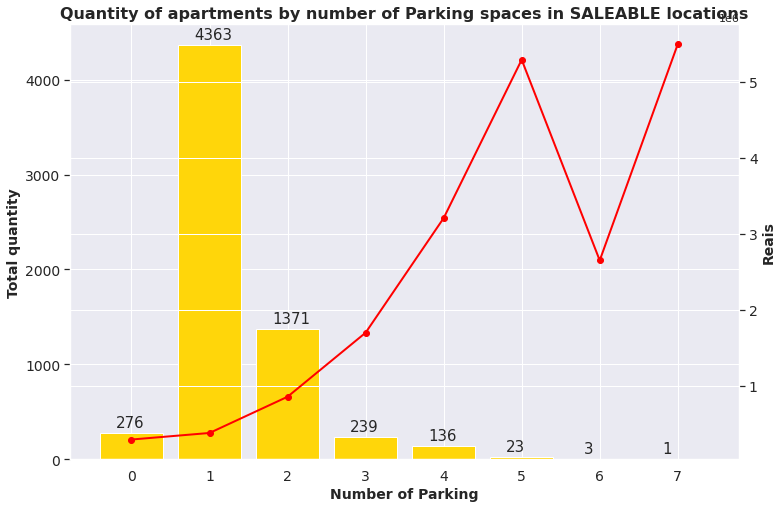

In [125]:
sale_number_parking = [sale_parking[c] for c in range(0,8)]
sale_num = [0,1,2,3,4,5,6,7]


fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()

ax.set_title("Quantity of apartments by number of Parking spaces in SALEABLE locations", fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Parking', fontsize=14, fontweight='bold')
ax.set_ylabel('Total quantity',  fontsize=14, fontweight='bold')
ax2.set_ylabel('Reais',  fontsize=14, fontweight='bold')
ax.set_xticks(ticks=num)
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax.bar(sale_num, sale_number_parking, color = '#FFD60A')
ax2.plot(sale_num, price_per_parking_sale, color='red', marker='o',linewidth=2)
for index,data in enumerate(sale_number_parking):
    ax.text(x=index - 0.2 , y =data+60 , s=f"{data}" , fontdict=dict(fontsize=15))

plt.show()

In [126]:
sale_elevator = sale_sp_data['Elevator'].value_counts()
sale_elevator

0    3748
1    2664
Name: Elevator, dtype: int64

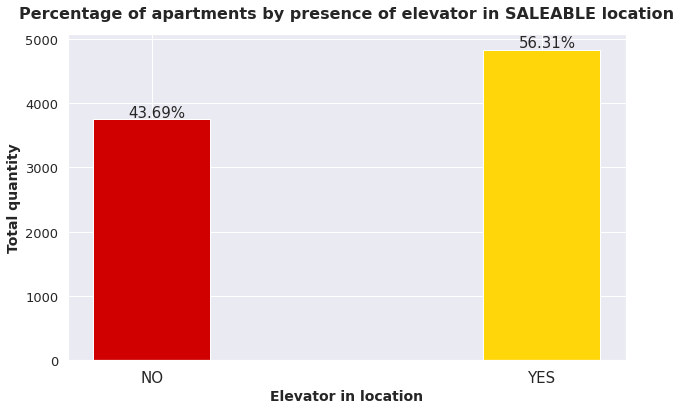

In [127]:
sale_number_elevator = [sale_elevator[0], elevator[1]]
sale_elevator_type = ['NO', 'YES']

plt.figure(figsize=(10,6))

plt.title("Percentage of apartments by presence of elevator in SALEABLE location", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Elevator in location', fontsize=14, fontweight='bold')
plt.ylabel('Total quantity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(sale_elevator_type, sale_number_elevator, color = ['#D00000','#FFD60A'], width=0.3)
for index,data in enumerate(sale_number_elevator):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(sale_number_elevator)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [128]:
sale_furnished = sale_sp_data['Furnished'].value_counts()
sale_furnished

0    5660
1     752
Name: Furnished, dtype: int64

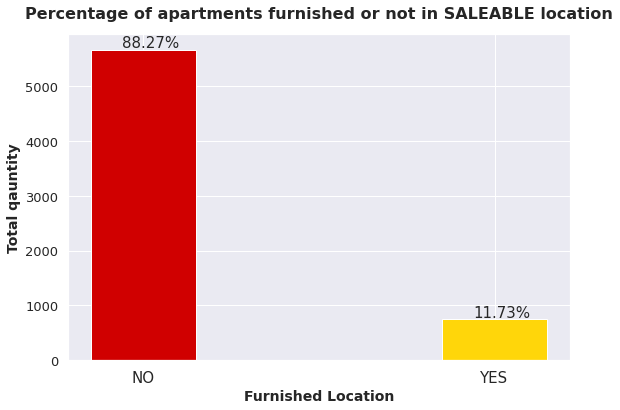

In [129]:
sale_number_furnished= [sale_furnished[c] for c in range(0,2)]
sale_is_furnished = ['NO', 'YES']

plt.figure(figsize=(9,6))

plt.title("Percentage of apartments furnished or not in SALEABLE location", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Furnished Location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(sale_is_furnished, sale_number_furnished, color = ['#D00000','#FFD60A'], width=0.3)
for index,data in enumerate(sale_number_furnished):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(sale_number_furnished)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

In [130]:
sale_pool = sale_sp_data['Swimming Pool'].value_counts()
sale_pool

1    3459
0    2953
Name: Swimming Pool, dtype: int64

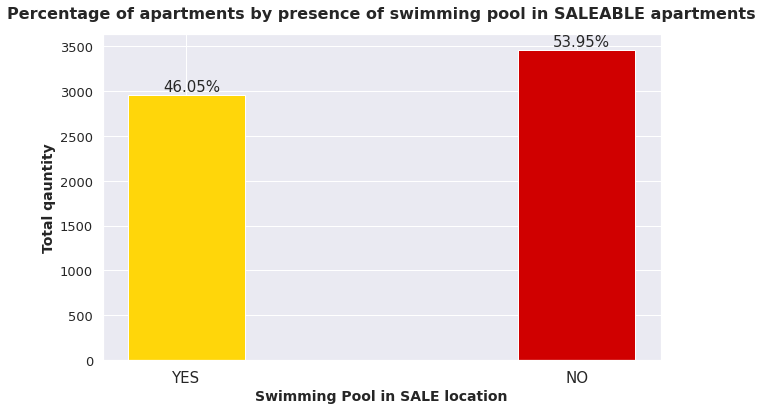

In [131]:
sale_number_pool = [sale_pool[c] for c in range(0,2)]
sale_is_pool = ['YES', 'NO']

plt.figure(figsize=(10,6))

plt.title("Percentage of apartments by presence of swimming pool in SALEABLE apartments", fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Swimming Pool in SALE location', fontsize=14, fontweight='bold')
plt.ylabel('Total qauntity',  fontsize=14, fontweight='bold')
plt.xticks(ticks=num, fontsize=15)
plt.yticks(fontsize='13')
plt.grid(True)

plt.bar(sale_is_pool, sale_number_pool, color = ['#FFD60A', '#D00000'], width=0.3)
for index,data in enumerate(sale_number_pool):
    plt.text(x=index-0.06 , y =data+40 , s=f"{data/sum(sale_number_pool)*100:.2f}%" , fontdict=dict(fontsize=15))

plt.show()

##Where are Loft's Saleable Apartments located?

HeatMap

In [132]:
sp_sale = folium.Map(
    location=[-23.5489, -46.6388]
) 

In [133]:
sale_sp_data = geo_sp_data.loc[sp_data['Negotiation Type']=='sale']

In [134]:
locations_sale = sale_sp_data[['Latitude', 'Longitude']]
location_sale_list = locations_sale.values.tolist()
location_sale_list[0]

[-23.552129, -46.692244]

In [135]:
heat_sale = HeatMap((location_sale_list),min_opacity=0.2, radius=17, blur=15, max_zoom=1)
sp_sale.add_child(heat_sale)
sp_sale

Compared to the Rentable apartments, the apartments for Sale are extremaly concentrated in the center of the city. There are few locations around the city and maybe a potencial market.

Diving into Top 6 most populated saleable districts

In [136]:
sale_district = sale_sp_data['District'].value_counts()[:10]
sale_district

Casa Verde/São Paulo       140
Bom Retiro/São Paulo       137
Brooklin/São Paulo         130
Moema/São Paulo            122
Bela Vista/São Paulo       120
Brás/São Paulo             117
Jaçanã/São Paulo           113
Santa Cecília/São Paulo    108
Belém/São Paulo            108
Barra Funda/São Paulo      107
Name: District, dtype: int64

In [137]:
sale_popular_districts = [149, 147, 139, 136, 130, 128, 119, 118, 115, 114]
sale_districts_labels = ['Casa Verde','Bom Retiro','Brooklin','Bela Vista','Moema','Brás','Barra Funda','Jaçanã','Santa Cecília','Liberdade']

In [138]:
price_district_sale = sale_sp_data.groupby('District').mean()
price_district_sale.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
District,,,,,,,,,,,,,,
Alto de Pinheiros/São Paulo,2.443442e+06,1382.250000,173.695652,3.065217,3.173913,1.891304,2.619565,0.489130,0.065217,0.695652,0.010870,-23.546908,-46.710279,12518.306196
Anhanguera/São Paulo,1.040806e+06,1094.583333,153.416667,3.138889,3.166667,2.111111,2.472222,0.750000,0.055556,0.666667,0.000000,-23.665496,-46.691405,6541.911111
Aricanduva/São Paulo,3.057954e+05,322.043478,57.202899,2.231884,1.594203,0.594203,1.173913,0.449275,0.043478,0.478261,0.086957,-23.557348,-46.518514,5220.881594
Artur Alvim/São Paulo,1.914217e+05,110.760870,46.478261,1.913043,1.782609,0.782609,0.978261,0.217391,0.000000,0.065217,0.086957,-23.544183,-46.483822,4170.881087
Barra Funda/São Paulo,5.702614e+05,512.485981,70.915888,2.261682,1.906542,0.766355,1.233645,0.467290,0.074766,0.672897,0.028037,-23.523675,-46.663497,7953.192243


In [139]:
sale_districts_loop = sale_district.keys()

In [140]:
price_top10_district_sale = []
for top_district in sale_districts_loop:
  for district in price_district_sale.index:
    if top_district == district:
      price_top10_district_sale.append(round(price_district_sale['Price'][district],2))
print(price_top10_district_sale)

[590347.56, 496839.07, 1308587.08, 1575049.18, 631820.92, 331788.03, 290893.46, 800764.94, 556349.97, 570261.37]


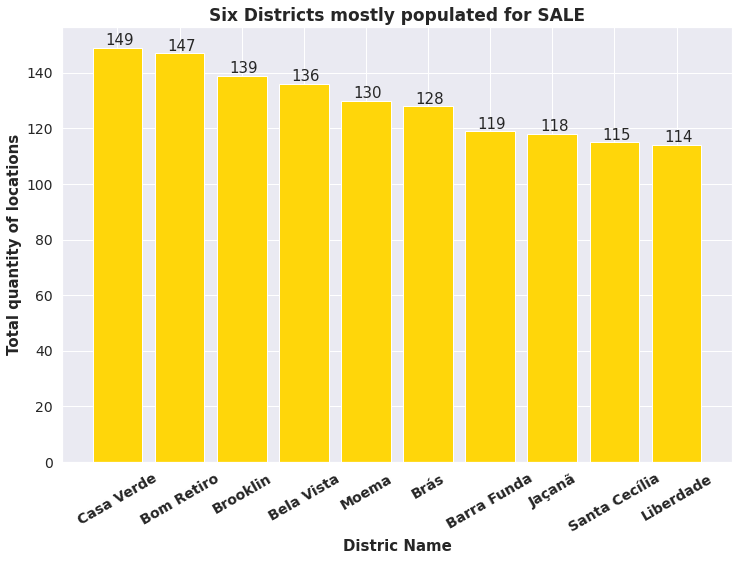

In [141]:
sale_popular_districts = [149, 147, 139, 136, 130, 128, 119, 118, 115, 114]
sale_districs_labels = ['Casa Verde','Bom Retiro','Brooklin','Bela Vista','Moema','Brás','Barra Funda','Jaçanã','Santa Cecília','Liberdade']
plt.figure(figsize=(12,8))

plt.title("Six Districts mostly populated for SALE", fontsize=17, fontweight='bold')
plt.xlabel('Distric Name', fontsize=15, fontweight='bold')
plt.ylabel('Total quantity of locations', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=30, fontweight='bold')
plt.yticks(fontsize='14')

plt.bar(sale_districts_labels, sale_popular_districts, color = '#FFD60A')
for index,data in enumerate(sale_popular_districts):
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

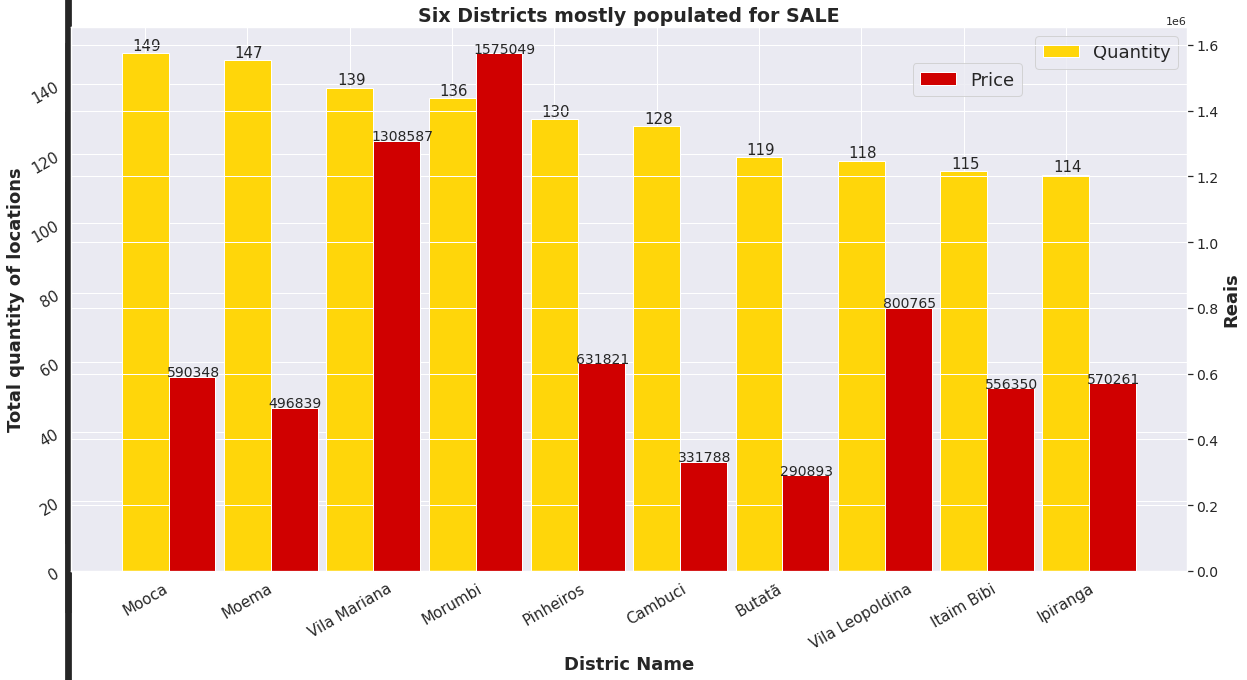

In [142]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()

x_index = np.arange(len(sale_districts_labels))*2.4
width = 1.1

ax.set_title("Six Districts mostly populated for SALE", fontsize=19, fontweight='bold')
ax.set_xlabel('Distric Name', fontsize=18, fontweight='bold')
ax.set_ylabel('Total quantity of locations', fontsize=18, fontweight='bold')
ax.set_xticks(x_index)
ax.set_xticklabels((rent_districts_labels))
ax2.set_ylabel('Reais',fontsize=18, fontweight='bold')
ax.tick_params(labelsize=15, rotation=30,width='501')
ax2.tick_params(labelsize=14)

ax.bar(x_index, sale_popular_districts, color = '#FFD60A', width=width, label='Quantity')
ax2.bar(x_index+width,price_top10_district_sale, color='#D00000', width=width, label='Price')
for index,data in enumerate(sale_popular_districts):
    ax.text(x=(index*2.4)-0.3 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
for index,price in enumerate(price_top10_district_sale):
    ax2.text(x=(index*2.4)+0.5 , y =price+1000 , s=f"{int(round(price,0))}" , fontdict=dict(fontsize=14))

ax.legend(loc=0, fontsize=18)
ax2.legend(fontsize=18, bbox_to_anchor=(0.86,0.95))

plt.show()

In [143]:
district_sale_df = sale_sp_data.groupby('District').mean().sort_values(by='Reais/square_meter')
district_sale_df.head(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Reais/square_meter
District,,,,,,,,,,,,,,
Cidade Tiradentes/São Paulo,113259.460000,78.160000,46.540000,1.940000,1.720000,0.720000,0.96,0.080000,0.020000,0.000000,0.000000,-23.595326,-46.401929,2459.803400
Lajeado/São Paulo,171412.820513,168.102564,48.717949,2.025641,1.897436,0.897436,1.00,0.128205,0.025641,0.076923,0.051282,-23.531837,-46.414614,3534.390769


## Understanding Price per Area

First with geopandas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


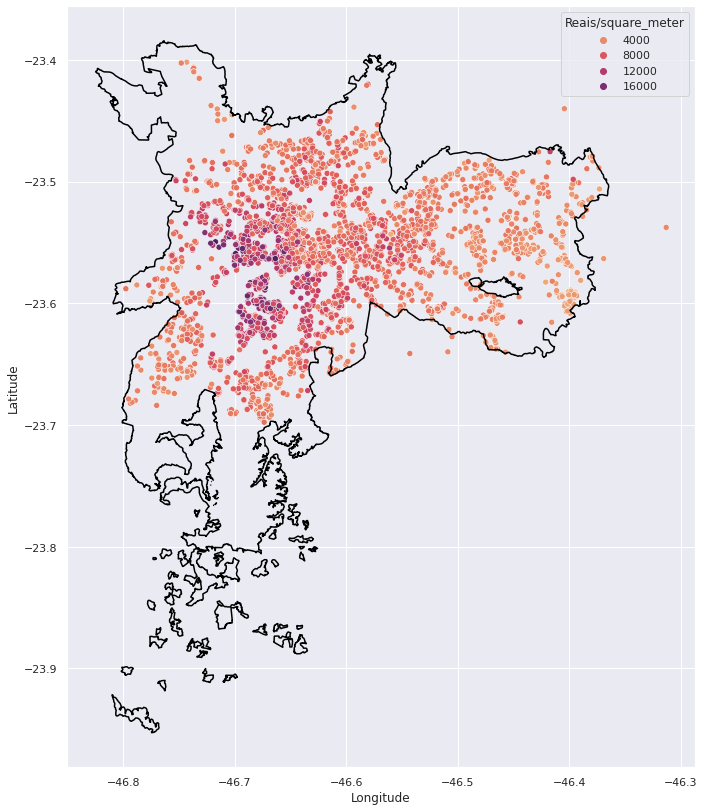

In [144]:
sp_geo.boundary.plot(color='Black',edgecolor='White', figsize=(20,14))
sns.scatterplot(sale_final_sp_data['Longitude'], sale_final_sp_data['Latitude'], hue=sale_final_sp_data['Reais/square_meter'],palette='flare')

TOP 10

In [145]:
distric_sale = district_sale_df.index.tolist()
low_district_sale = distric_sale[:][:10]
high_district_sale = distric_sale[:][84:94]

price_sale = district_sale_df['Reais/square_meter'].tolist()
low_price_sale = price_sale[:][:10]
high_price_sale = price_sale[:][84:94]

In [146]:
bar_sp_sale = pd.DataFrame({'low_district': low_district_sale, 'low_price': low_price_sale,
                            'high_district': high_district_sale, 'high_price': high_price_sale})
bar_sp_sale = bar_sp_sale.sort_values('low_price',ascending=False)

In [147]:
bar_sp_sale.head()

,low_district,low_price,high_district,high_price
9,Capão Redondo/São Paulo,4315.198333,Vila Olimpia/São Paulo,14395.442250
8,Jardim São Luis/São Paulo,4308.119024,Itaim Bibi/São Paulo,14250.291528
7,Cidade Líder/São Paulo,4307.370179,Alto de Pinheiros/São Paulo,12518.306196
6,Itaquera/São Paulo,4188.191216,Vila Madalena/São Paulo,12048.615122
5,Artur Alvim/São Paulo,4170.881087,Jardim Paulista/São Paulo,11693.696620


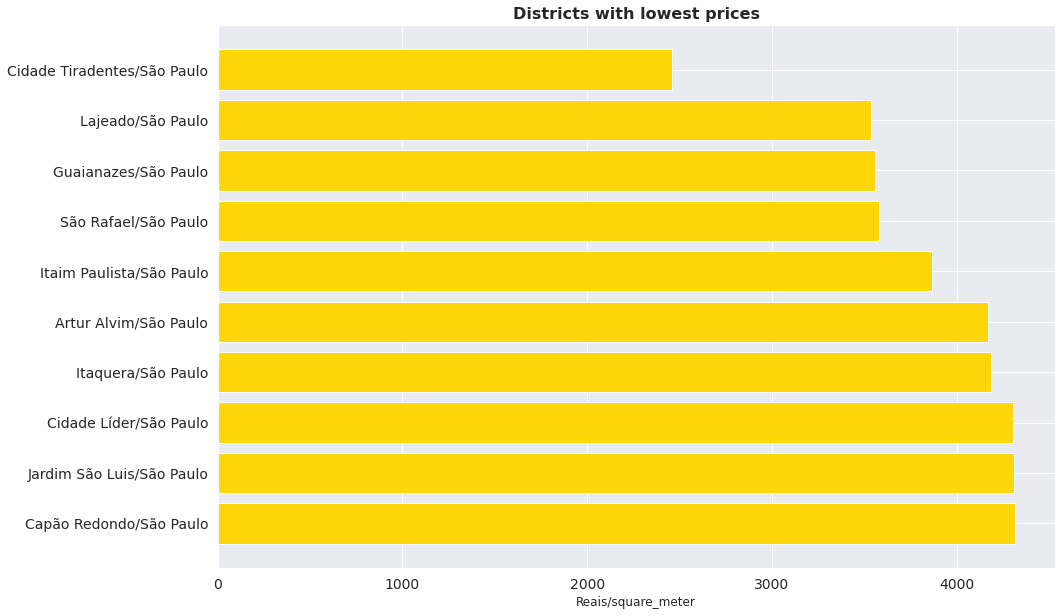

In [148]:

plt.figure(figsize=(15,10))

plt.title('Districts with lowest prices', fontsize=16, fontweight='bold')
plt.xlabel('Reais/square_meter')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.barh(bar_sp_sale['low_district'], bar_sp_sale['low_price'], color='#FFD60A')
plt.show()

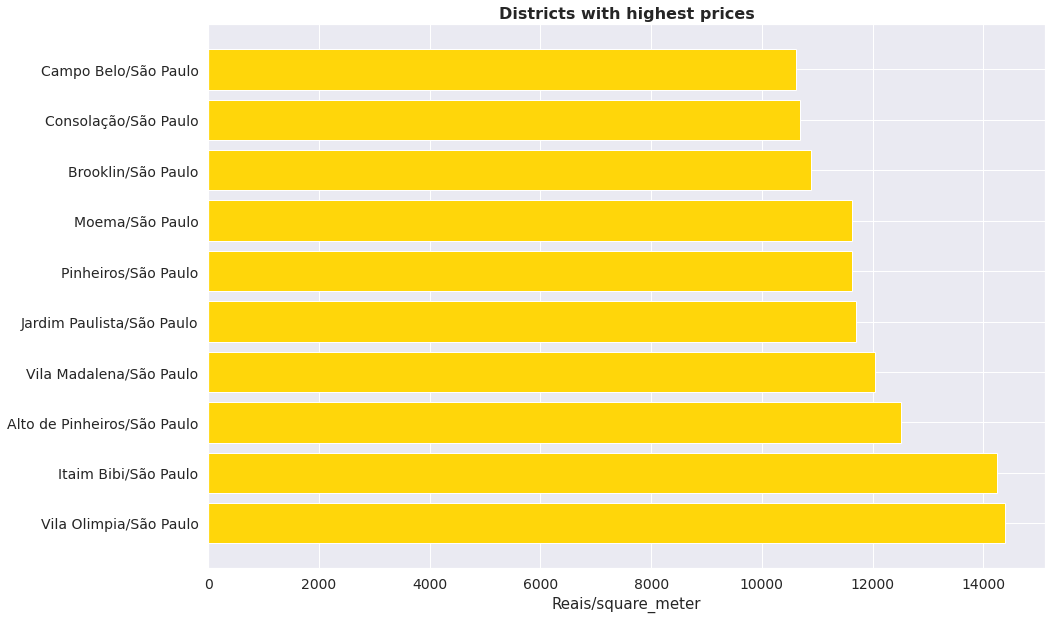

In [149]:
plt.figure(figsize=(15,10))

plt.title('Districts with highest prices', fontsize=16, fontweight='bold')
plt.xlabel('Reais/square_meter', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.barh(bar_sp_sale['high_district'], bar_sp_sale['high_price'], color='#FFD60A')
plt.show()

##What determine price?

In [150]:
sale_sp_data_tree = sale_sp_data.drop(['Property Type', 'Negotiation Type'],axis=1).copy()
sale_sp_data_tree.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude,Reais/square_meter
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,-23.552129,-46.692244,9900.00
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,-23.551613,-46.699106,12134.15
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,-23.547687,-46.692594,10285.71


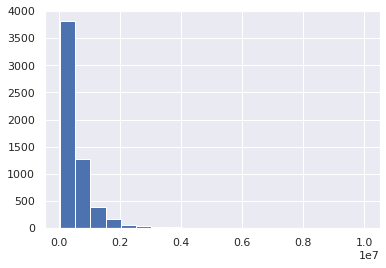

In [151]:
sale_sp_data_tree['Price'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


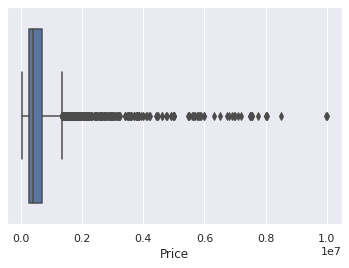

In [152]:
sns.boxplot(sale_sp_data_tree['Price'])

In [153]:
sale_sp_data_tree = sale_sp_data_tree.loc[sale_sp_data_tree['Price']<2000000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


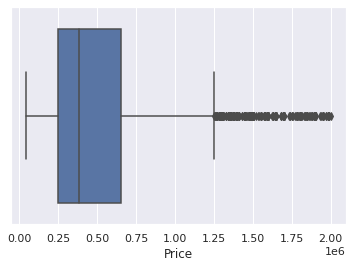

In [154]:
sns.boxplot(sale_sp_data_tree['Price'])

In [155]:
sale_sp_data_tree.corr().loc['Price', :].sort_values(ascending=False)

Price                 1.000000
Size                  0.814701
Reais/square_meter    0.683356
Condo                 0.649520
Parking               0.637708
Toilets               0.616238
Suites                0.531910
Rooms                 0.517472
Swimming Pool         0.204782
Furnished             0.111949
Elevator              0.084551
New                  -0.036619
Latitude             -0.094709
Longitude            -0.382489
Name: Price, dtype: float64

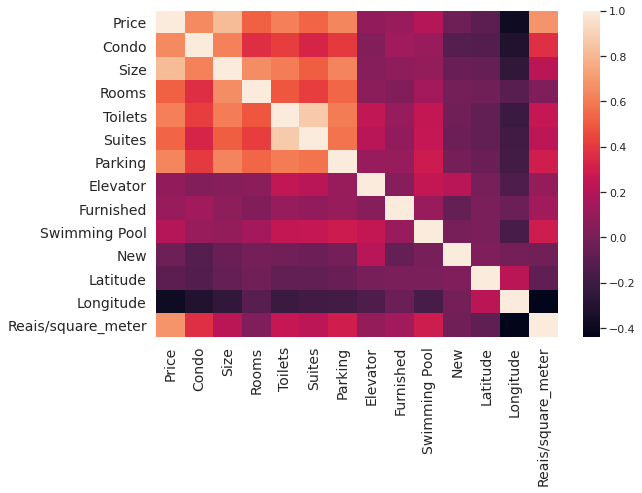

In [156]:
plt.figure(figsize=(9,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(sale_sp_data_tree.corr())

In [157]:
sale_sp_data_tree['District'].value_counts()[0:45]

Casa Verde/São Paulo            139
Bom Retiro/São Paulo            137
Brás/São Paulo                  117
Bela Vista/São Paulo            117
Brooklin/São Paulo              115
Jaçanã/São Paulo                113
Barra Funda/São Paulo           107
Belém/São Paulo                 107
Mandaqui/São Paulo              106
Liberdade/São Paulo             104
Mooca/São Paulo                 104
Santa Cecília/São Paulo         101
República/São Paulo              94
Pinheiros/São Paulo              93
Moema/São Paulo                  93
Consolação/São Paulo             92
Vila Prudente/São Paulo          89
Vila Formosa/São Paulo           85
Perdizes/São Paulo               84
Cambuci/São Paulo                83
São Lucas/São Paulo              82
Cidade Ademar/São Paulo          82
Vila Curuçá/São Paulo            76
Vila Maria/São Paulo             75
Itaquera/São Paulo               74
Ermelino Matarazzo/São Paulo     73
Sé/São Paulo                     73
Parque do Carmo/São Paulo   

In [158]:
sum(sale_sp_data_tree['District'].value_counts()[0:45]) / sum(sale_sp_data_tree['District'].value_counts())

0.669980472217291

In [159]:
sale_45 = sale_sp_data_tree['District'].value_counts()[0:45].keys()

In [160]:
cont = 46#
for i in sale_45:
  print(i)
  cont = cont - 1
  print(cont)
  for index, c in enumerate(sale_sp_data_tree['District']):
    if i == c:
      sale_sp_data_tree['District'] = np.where(sale_sp_data_tree['District'] == i, str(cont), sale_sp_data_tree['District'])


Casa Verde/São Paulo
45
Bom Retiro/São Paulo
44
Brás/São Paulo
43
Bela Vista/São Paulo
42
Brooklin/São Paulo
41
Jaçanã/São Paulo
40
Barra Funda/São Paulo
39
Belém/São Paulo
38
Mandaqui/São Paulo
37
Liberdade/São Paulo
36
Mooca/São Paulo
35
Santa Cecília/São Paulo
34
República/São Paulo
33
Pinheiros/São Paulo
32
Moema/São Paulo
31
Consolação/São Paulo
30
Vila Prudente/São Paulo
29
Vila Formosa/São Paulo
28
Perdizes/São Paulo
27
Cambuci/São Paulo
26
São Lucas/São Paulo
25
Cidade Ademar/São Paulo
24
Vila Curuçá/São Paulo
23
Vila Maria/São Paulo
22
Itaquera/São Paulo
21
Ermelino Matarazzo/São Paulo
20
Sé/São Paulo
19
Parque do Carmo/São Paulo
18
Cangaíba/São Paulo
17
Campo Grande/São Paulo
16
Água Rasa/São Paulo
15
Aricanduva/São Paulo
14
Carrão/São Paulo
13
Jabaquara/São Paulo
12
São Mateus/São Paulo
11
Sapopemba/São Paulo
10
Vila Guilherme/São Paulo
9
Penha/São Paulo
8
Tatuapé/São Paulo
7
Santo Amaro/São Paulo
6
Campo Limpo/São Paulo
5
Guaianazes/São Paulo
4
Ipiranga/São Paulo
3
Tucuruvi

In [161]:
sale_sp_data_tree['District'] = pd.to_numeric(sale_sp_data_tree['District'], errors='coerce')
sale_sp_data_tree['District'] = sale_sp_data_tree['District'].fillna('0')

In [162]:
x_train_sale, x_test_sale, y_train_sale, y_test_sale = train_test_split(sale_sp_data_tree.drop(['Price', 'Reais/square_meter'],axis=1), sale_sp_data_tree['Price'],
                                                    test_size=0.25, random_state=42)

In [163]:
n_leafs = [1, 2, 3, 4, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
param_grid_tree = [{'max_depth':depths,
              'min_samples_leaf':n_leafs}]

In [164]:
gd_tree = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid_tree, scoring= 'neg_mean_squared_error', cv=10)
best_decisiontree = gd_tree.fit(x_train_sale, y_train_sale)
print(best_decisiontree.best_params_) 

{'max_depth': 12, 'min_samples_leaf': 10}


In [165]:

tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=10)
tree_model = tree.fit(x_train_sale, y_train_sale)
tree_predict = tree_model.predict(x_test_sale)
tree_mse = mean_squared_error(y_test_sale, tree_predict)
tree_rmse = np.sqrt(tree_mse)
importances = tree_model.feature_importances_

print(f'Mean Squared Error: {tree_rmse}')
print('----------')
for i,c in enumerate(importances):
	print(f'Feature: {i}, Score: {c:.3f}')



Mean Squared Error: 152137.65693448443
----------
Feature: 0, Score: 0.063
Feature: 1, Score: 0.787
Feature: 2, Score: 0.003
Feature: 3, Score: 0.006
Feature: 4, Score: 0.004
Feature: 5, Score: 0.018
Feature: 6, Score: 0.001
Feature: 7, Score: 0.001
Feature: 8, Score: 0.006
Feature: 9, Score: 0.000
Feature: 10, Score: 0.005
Feature: 11, Score: 0.030
Feature: 12, Score: 0.076


In [166]:
sale_features =['Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool','New','District','Latitude',	'Longitude']

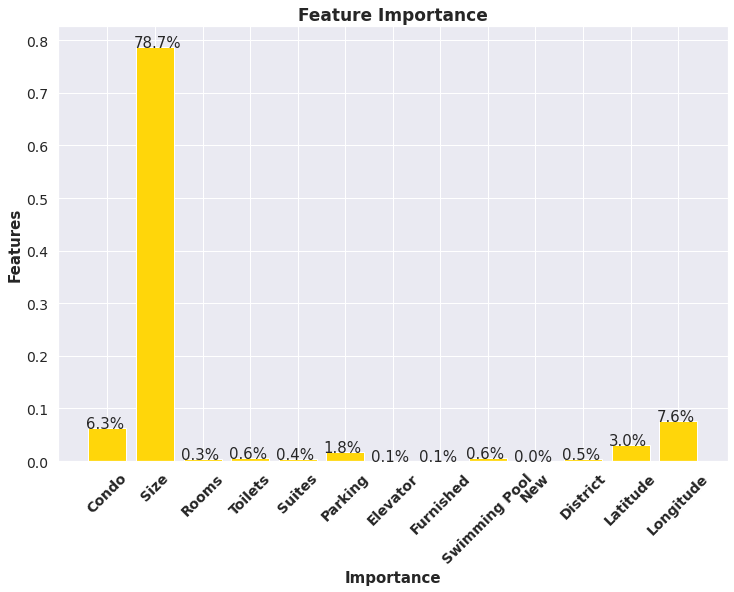

In [167]:
plt.figure(figsize=(12,8))

plt.title("Feature Importance", fontsize=17, fontweight='bold')
plt.xlabel('Importance', fontsize=15, fontweight='bold')
plt.ylabel('Features', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=45, fontweight='bold')
plt.yticks(fontsize='14')

plt.bar(sale_features, importances, color='#FFD60A')
for index,data in enumerate(importances):
    plt.text(x=index-0.45 , y =data , s=f"{round(data*100,1)}%" , fontdict=dict(fontsize=15))
plt.show()

#Final

- We are in the end of the process and we want to see how much money each type of property (rent or sale) could return to Loft's apartments.

  - Lets imagine if all Loft apartments for sale could the sold in the period of 5 years, and all apartments for rent could be rented for 5 years straight
  - And we're going to do that with an interactive graph

In [168]:
# saving into a list the sum of all the values for sale, and the sum of all apartments for rent for 5 years (12 months x  5 years)
total_values = [sum(sale_sp_data['Price']), sum(rent_sp_data['Price'])*12*5]
labels = ['Sale', 'Rent']

In [169]:
#installing plotly, a great lib for plot interactive plots
!pip install plotly
!pip install plotly.graph_objects

ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


In [170]:
import plotly.offline as py
import plotly.graph_objects as go

In [171]:
colors=['#FFD60A','#0A4C65']
trace = go.Pie(labels = labels,
               values = total_values,
               marker = {'colors': colors,
                        'line' : {'color':'#000000','width':2}},
               direction='clockwise')


In [172]:
data = [trace]
data

[Pie({
     'direction': 'clockwise',
     'labels': [Sale, Rent],
     'marker': {'colors': ['#FFD60A', '#0A4C65'], 'line': {'color': '#000000', 'width': 2}},
     'values': [3626309682, 1244636400]
 })]

In [173]:
layout = go.Layout(title='algo')

In [174]:
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="Potencial gain with 5 years of rent and all properties for sale",
         title_x=0.5,
         legend_x=0.7)

In [175]:
#if you don't want to use fig.update_layout you can plot this graph like this:
#py.iplot(fig)

We can see that the total potential amount of money in a period of five years is concentrated (3/4) with the apartments for sale and only 1/4 of it is on the rentable apartments. Thats where the money will came from in the next 5 years in the optimal case.

  THE END